# Import packages

In [5]:
%load_ext autoreload
%autoreload 2

import os, sys, sys
from pathlib import Path
for p in [Path.cwd()] + list(Path.cwd().parents):
    if p.name == 'Multifirefly-Project':
        os.chdir(p)
        sys.path.insert(0, str(p / 'multiff_analysis/multiff_code/methods'))
        break
    
from data_wrangling import specific_utils, process_monkey_information, general_utils
from pattern_discovery import pattern_by_trials, pattern_by_trials, cluster_analysis, organize_patterns_and_features
from visualization.matplotlib_tools import plot_behaviors_utils
from neural_data_analysis.neural_analysis_tools.get_neural_data import neural_data_processing
from neural_data_analysis.neural_analysis_tools.visualize_neural_data import plot_neural_data, plot_modeling_result
from neural_data_analysis.neural_analysis_tools.model_neural_data import transform_vars, neural_data_modeling, drop_high_corr_vars, drop_high_vif_vars
from neural_data_analysis.topic_based_neural_analysis.neural_vs_behavioral import prep_monkey_data, prep_target_data, neural_vs_behavioral_class
from neural_data_analysis.topic_based_neural_analysis.planning_and_neural import planning_and_neural_class, pn_utils, pn_helper_class, pn_aligned_by_seg, pn_aligned_by_event
from neural_data_analysis.neural_analysis_tools.cca_methods import cca_class
from neural_data_analysis.neural_analysis_tools.cca_methods import cca_class, cca_utils, cca_cv_utils
from neural_data_analysis.neural_analysis_tools.cca_methods.cca_plotting import cca_plotting, cca_plot_lag_vs_no_lag, cca_plot_cv
from machine_learning.ml_methods import regression_utils, regz_regression_utils, ml_methods_class, classification_utils, ml_plotting_utils, ml_methods_utils
from planning_analysis.show_planning import nxt_ff_utils, show_planning_utils
from neural_data_analysis.neural_analysis_tools.gpfa_methods import elephant_utils, fit_gpfa_utils, plot_gpfa_utils, gpfa_helper_class
from neural_data_analysis.neural_analysis_tools.align_trials import time_resolved_regression, time_resolved_gpfa_regression,plot_time_resolved_regression
from neural_data_analysis.neural_analysis_tools.align_trials import align_trial_utils

import sys
import math
import gc
import subprocess
from pathlib import Path
from importlib import reload

# Third-party imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from scipy import linalg, interpolate
from scipy.signal import fftconvolve
from scipy.io import loadmat
from scipy import sparse
import torch
from numpy import pi

# Machine Learning imports
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.multivariate.cancorr import CanCorr

# Neuroscience specific imports
import neo
import rcca
import quantities as pq

plt.rcParams["animation.html"] = "html5"
os.environ['KMP_DUPLICATE_LIB_OK']='True'
rc('animation', html='jshtml')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['animation.embed_limit'] = 2**128
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)
print("done")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
done
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# retrieve data

In [6]:
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Schro/data_0416"
# raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Schro/data_0321"
# raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Schro/data_0329"
# raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Schro/data_0403"

In [7]:
# raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0312"
# raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0330"
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0316"
# raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0327"
# raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0328"

In [9]:
reduce_y_var_lags = False
planning_data_by_point_exists_ok = True
y_data_exists_ok = True
bin_width = 0.1

pn = pn_aligned_by_event.PlanningAndNeuralEventAligned(raw_data_folder_path=raw_data_folder_path, bin_width=bin_width)
pn.prep_data_to_analyze_planning(planning_data_by_point_exists_ok=planning_data_by_point_exists_ok)
pn.planning_data_by_point, cols_to_drop = general_utils.drop_columns_with_many_nans(
    pn.planning_data_by_point)
#pn.get_x_and_y_data_for_modeling(exists_ok=y_data_exists_ok, reduce_y_var_lags=reduce_y_var_lags)

Loaded binned_spikes_df from all_monkey_data/processed_neural_data/monkey_Bruno/data_0316/binned_spikes_df_0p1.csv
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Removed 0 rows out of 780 rows where cur_ff was not visible bbas or nxt_ff was not visible both bbas and bsans
shared_stops_near_ff_df has 780 rows
Retrieving shared_stops_near_ff_df succeeded
[Warning] 0.232% of ff_y_relative values are negative and will be removed.
[Warning] 6.047% of ff_x_relative > ff_y_relative. Rows will be removed.
[Warning] 0.255% of ff_x_relative > ff_y_relative. Rows will be removed.
Successfully retrieved diff_in_curv_df from all_monkey_data/planning/monkey_Bruno/data_0316/diff_in_curv_df/opt_arc_stop_closest/test/cur_vis_0_1_window_-25cm_0cm
Successfully retrieved heading_info_df from all_monkey_data/planning/monkey_Bruno/data_0316/heading_info_df/opt_arc_stop_closest/test

In [13]:
pn.get_x_and_y_data_for_modeling(exists_ok=y_data_exists_ok, reduce_y_var_lags=False)

0.23% of rows are dropped in planning_data_by_bin due to having missing values
binned_spikes_df.shape: (53470, 23)
self.x_var.shape: (10066, 24)
self.y_var.shape: (10066, 37)
Getting y_var_reduced...
Loaded y_var_reduced from all_monkey_data/planning_and_neural/monkey_Bruno/data_0316/pn_y_var_reduced.csv
x_var.shape: (10066, 24)
y_var.shape: (10066, 37)
x_var_reduced.shape: (10066, 24)
y_var_reduced.shape: (10066, 34)
x_var_lags.shape: (10066, 255)
y_var_lags.shape: (10066, 398)


# get planning_data by segment

## get data and fit gpfa

In [14]:
pn.prepare_seg_aligned_data()
pn.get_gpfa_traj(latent_dimensionality=7, exists_ok=True)

# for regression later
use_raw_spike_data_instead = False
use_lagged_rebinned_behav_data = False
pn.get_concat_data_for_regression(use_raw_spike_data_instead=use_raw_spike_data_instead,
                                  use_lagged_rebinned_behav_data=use_lagged_rebinned_behav_data,
                                  apply_pca_on_raw_spike_data=True,
                                  use_lagged_raw_spike_data=False,) 


pn.print_data_dimensions()

new_seg_duration is now 1.0, and post_event_window is now 0.75
Loaded new_seg_info from all_monkey_data/planning_and_neural/monkey_Bruno/data_0316/new_seg_info/tlim2_cur_first_pre0p25_post0p75.csv
Dropped 43 columns due to containing NA in rebinned_y_var via calling drop_na_cols function: ['nxt_opt_arc_curv', 'cur_opt_arc_curv', 'cur_cntr_arc_curv', 'nxt_cntr_arc_curv', 'cur_opt_arc_end_heading', 'angle_opt_cur_end_to_nxt_ff', 'angle_from_stop_to_nxt_ff', 'diff_in_angle_to_nxt_ff', 'diff_in_abs_angle_to_nxt_ff', 'traj_curv_to_stop', 'curv_from_stop_to_nxt_ff', 'opt_curv_to_cur_ff', 'curv_from_cur_end_to_nxt_ff', 'd_curv_null_arc', 'd_curv_monkey', 'abs_d_curv_null_arc', 'abs_d_curv_monkey', 'diff_in_d_curv', 'diff_in_abs_d_curv', 'abs_angle_opt_cur_end_to_nxt_ff', 'abs_angle_from_stop_to_nxt_ff', 'abs_diff_in_angle_to_nxt_ff', 'abs_diff_in_abs_angle_to_nxt_ff', 'monkey_angle_target_last_seen', 'target_last_seen_angle', 'cum_distance_target_cluster_last_seen', 'distance_from_monkey_pos_

## gpfa DURING train test split (also point-wise)

In [15]:
pn.prepare_seg_aligned_data()
pn.get_concat_data_for_regression(use_raw_spike_data_instead=True) 

new_seg_duration is now 1.0, and post_event_window is now 0.75
Loaded new_seg_info from all_monkey_data/planning_and_neural/monkey_Bruno/data_0316/new_seg_info/tlim2_cur_first_pre0p25_post0p75.csv
Dropped 43 columns due to containing NA in rebinned_y_var via calling drop_na_cols function: ['nxt_opt_arc_curv', 'cur_opt_arc_curv', 'cur_cntr_arc_curv', 'nxt_cntr_arc_curv', 'cur_opt_arc_end_heading', 'angle_opt_cur_end_to_nxt_ff', 'angle_from_stop_to_nxt_ff', 'diff_in_angle_to_nxt_ff', 'diff_in_abs_angle_to_nxt_ff', 'traj_curv_to_stop', 'curv_from_stop_to_nxt_ff', 'opt_curv_to_cur_ff', 'curv_from_cur_end_to_nxt_ff', 'd_curv_null_arc', 'd_curv_monkey', 'abs_d_curv_null_arc', 'abs_d_curv_monkey', 'diff_in_d_curv', 'diff_in_abs_d_curv', 'abs_angle_opt_cur_end_to_nxt_ff', 'abs_angle_from_stop_to_nxt_ff', 'abs_diff_in_angle_to_nxt_ff', 'abs_diff_in_abs_angle_to_nxt_ff', 'monkey_angle_target_last_seen', 'target_last_seen_angle', 'cum_distance_target_cluster_last_seen', 'distance_from_monkey_pos_

## * Try only a few features right now

In [49]:

key_feats = [
    'new_bin', 'new_segment', 'whether_test',
    'cur_eye_hor_l', 'cur_eye_ver_l', 'cur_eye_hor_r', 'cur_eye_ver_r',
    'nxt_eye_hor_l', 'nxt_eye_ver_l', 'nxt_eye_hor_r', 'nxt_eye_ver_r',
    'LDz', 'RDz', 'LDx', 'RDx',
    'gaze_mky_view_x', 'gaze_mky_view_y', 'gaze_mky_view_angle',
'cur_opt_arc_dheading',
'cur_ff_distance',
'cur_ff_rel_x',
'cur_ff_rel_y',
'nxt_ff_rel_x',
'nxt_ff_rel_y',
'nxt_ff_distance',
'num_ff_visible',
'num_ff_in_memory',
'cur_ff_distance_at_ref',
'cur_ff_angle_boundary_at_ref',
'nxt_ff_distance_at_ref',
'ang_speed',
'speed',
'accel',
'ang_accel',
'monkey_speeddummy',
'curv_of_traj',
'angle_from_cur_ff_to_nxt_ff',
'time_since_last_capture',
'bin_mid_time_rel_to_event',
'time', 
'target_index',
# categorical modeling for the below:
'cur_vis',
'nxt_vis',
'nxt_in_memory',
'any_ff_visible',
# 'cur_in_memory', # don't used those two cause they will just be one
# 'any_ff_in_memory',

]

In [50]:
has_duplicates = len(key_feats) != len(set(key_feats)) 
print(has_duplicates)

dupes = {x for x in key_feats if key_feats.count(x) > 1}
print(dupes)

False
set()


In [51]:
pn.get_concat_data_for_regression(use_raw_spike_data_instead=False,
                                    apply_pca_on_raw_spike_data=False,
                                    use_lagged_raw_spike_data=True) 



No NA values found in concat_neural_trials

No NA values found in concat_behav_trials


In [52]:
import numpy as np
import pandas as pd

def _prep_behav(df, key_feats,
                cont_cols=('cur_ff_distance', 'nxt_ff_distance', 'time_since_last_capture'),
                cat_vars=('cur_vis', 'nxt_vis', 'nxt_in_memory', 'any_ff_visible')):
    # keep only requested features (that exist), copy to avoid side effects
    keep = [c for c in key_feats if c in df.columns]
    out = df.loc[:, keep].copy()

    # add log1p features (clip negatives to 0 to keep log1p valid)
    for c in cont_cols:
        if c in out.columns:
            out[f'log1p_{c}'] = np.log1p(pd.to_numeric(out[c], errors='coerce').clip(lower=0))

    # binarize categorical indicators ( > 0 → 1; else 0 )
    for v in cat_vars:
        if v in out.columns:
            x = pd.to_numeric(out[v], errors='coerce')
            out[v] = (x.fillna(0) > 0).astype('int8')

    return out

# Apply to both datasets
pn.concat_behav_trials = _prep_behav(pn.concat_behav_trials, key_feats)
pn.rebinned_behav_data = _prep_behav(pn.rebinned_behav_data, key_feats)

# (Optional) peek at shapes
print('concat_behav_trials:', pn.concat_behav_trials.shape)
print('rebinned_behav_data:', pn.rebinned_behav_data.shape)


concat_behav_trials: (3714, 46)
rebinned_behav_data: (3714, 46)


In [53]:
mask = pn.concat_behav_trials['bin_mid_time_rel_to_event'] > 0
pn.concat_behav_trials = pn.concat_behav_trials[mask]
pn.concat_neural_trials = pn.concat_neural_trials[mask]

### ** concat regression

(2598, 9)
(2598, 46)
test_or_control: both
x_var dimensions: (2598, 7)
y_var dimensions: (2598, 46)


/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/

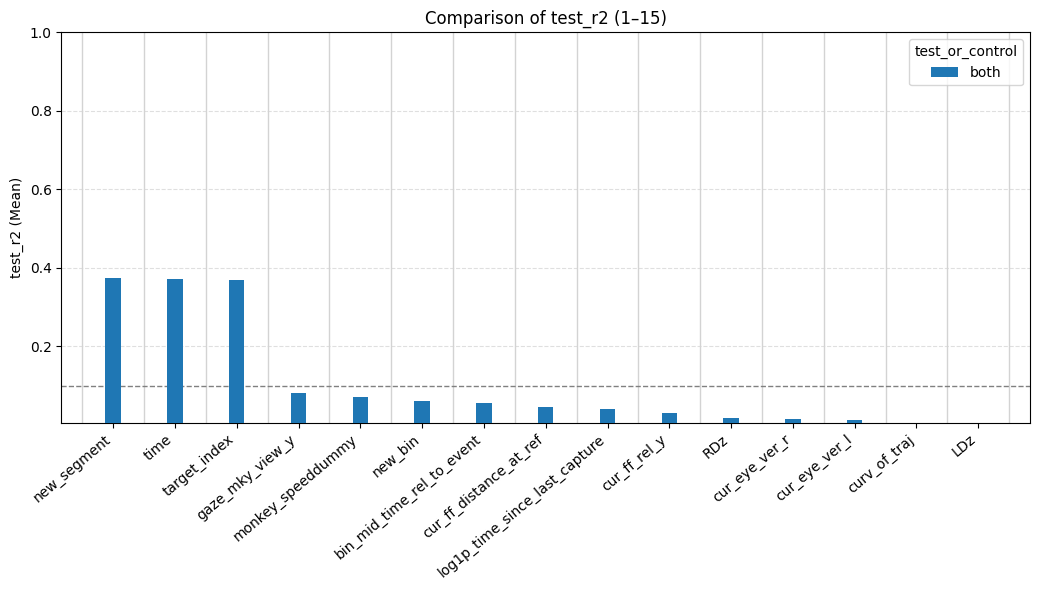

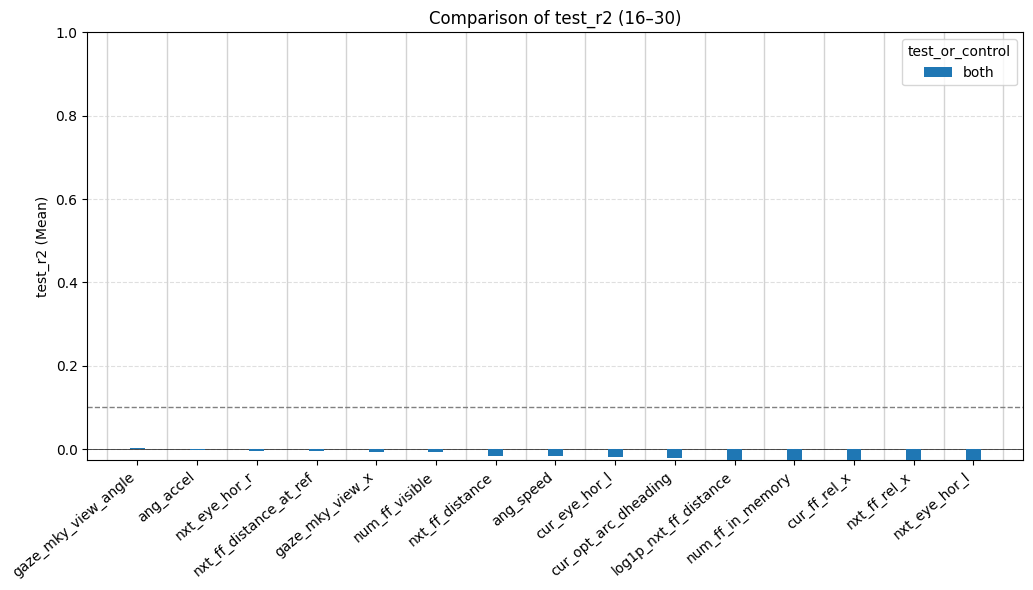

In [54]:
print(pn.concat_neural_trials.shape)
print(pn.concat_behav_trials.shape)

pn.separate_test_and_control_data()
# columns_of_interest = ['whether_test', 'cur_ff_distance', 'cur_ff_angle', 'nxt_ff_distance', 'nxt_ff_rel_y', 'nxt_opt_arc_dheading', 'nxt_ff_rel_x', 'nxt_ff_angle', 'nxt_ff_angle_at_ref']
columns_of_interest = pn.concat_behav_trials.columns
all_results = []
for test_or_control in ['both']: #['test', 'control', 'both']:
    x_var, y_var = pn.get_concat_x_and_y_var_for_lr(test_or_control=test_or_control)
    
    results_summary = ml_methods_utils.run_segment_split_regression_cv(
        x_var, 
        y_var, 
        columns_of_interest, 
        num_folds=5, 
    )
    results_summary['test_or_control'] = test_or_control
    all_results.append(results_summary)

all_results = pd.concat(all_results)
all_results.head()

reg_results = all_results[all_results['Model'] == 'Linear Regression']
class_results = all_results[all_results['Model'] == 'Logistic Regression']





# first only plot key_features cur_ff_distance
key_features = ['cur_ff_distance', 'log1p_cur_ff_distance', 'speed', 'accel', 'time_since_last_capture']
for metric in ['test_r2']:
    ml_methods_utils.make_barplot_to_compare_results(
            reg_results, 
            metric=metric, 
            features=key_features,
        )
    print('='*100)
    print('='*100)



rest_of_features = [c for c in reg_results['Feature'].unique() if c not in key_features]

# regression results
for metric in ['test_r2']:
    ml_methods_utils.make_barplot_to_compare_results(
            reg_results, 
            metric=metric, 
            features=rest_of_features,
        )
    print('='*100)
    print('='*100)
    
# classification results
for metric in ['test_roc_auc', 'test_f1']:
    ml_methods_utils.make_barplot_to_compare_results(
        class_results, 
        metric=metric, 
    )

In [55]:
pn.concat_behav_trials[cat_vars].describe()

NameError: name 'cat_vars' is not defined

### ** try Catboost

In [ ]:
from catboost import CatBoostRegressor

behav_feature = 'log1p_cur_ff_distance'
y_true = y_var[behav_feature].to_numpy()

model = CatBoostRegressor(iterations=500, depth=6, learning_rate=0.05, loss_function='RMSE', verbose=0)
model.fit(x_var, y_var[behav_feature])
preds = model.predict(x_var)

R = 0.555 | R^2 = 0.267 | RMSE = 0.589


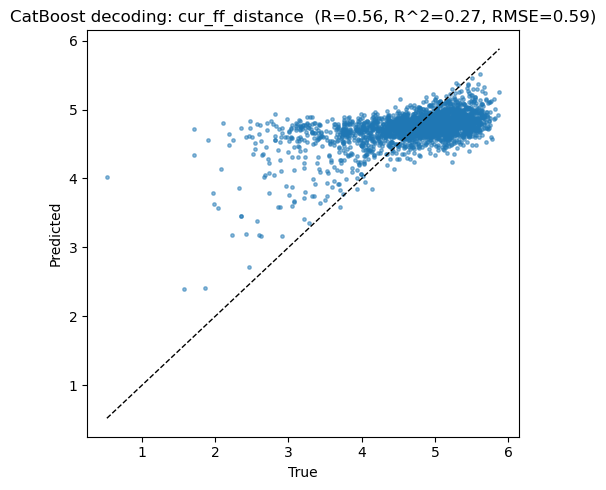

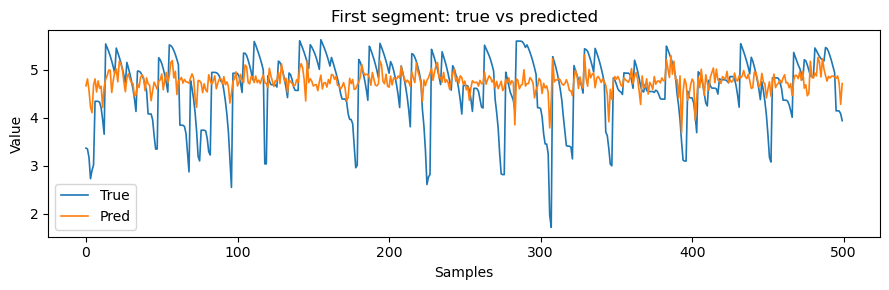

In [ ]:

y_pred = preds
stats = eval_decoder(y_true, y_pred, title='CatBoost decoding: cur_ff_distance')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

def eval_decoder(y_true, y_pred, title='Decoder fit', sample_ts=None, n_show=500):
    """
    Back-compatible evaluation (no need for sklearn>=0.22).
    - y_true, y_pred: 1D array-like
    - sample_ts: optional 1D times for the overlay plot
    - n_show: how many samples to show in the overlay
    """
    y_true = np.asarray(y_true).ravel()
    y_pred = np.asarray(y_pred).ravel()
    # drop NaNs in a paired way
    ok = ~(np.isnan(y_true) | np.isnan(y_pred))
    y_true, y_pred = y_true[ok], y_pred[ok]
    if sample_ts is not None:
        sample_ts = np.asarray(sample_ts).ravel()[ok]

    # metrics (old sklearn safe)
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    # Pearson R (scale-invariant)
    if y_true.std() == 0 or y_pred.std() == 0:
        R = np.nan
    else:
        R = np.corrcoef(y_true, y_pred)[0, 1]

    print(f'R = {R:.3f} | R^2 = {r2:.3f} | RMSE = {rmse:.3f}')

    # scatter with unity line
    plt.figure(figsize=(5, 5))
    plt.scatter(y_true, y_pred, s=6, alpha=0.5)
    lo = float(min(y_true.min(), y_pred.min()))
    hi = float(max(y_true.max(), y_pred.max()))
    plt.plot([lo, hi], [lo, hi], 'k--', linewidth=1)
    plt.xlabel('True')
    plt.ylabel('Predicted')
    plt.title(f'{title}  (R={R:.2f}, R^2={r2:.2f}, RMSE={rmse:.2f})')
    plt.tight_layout()

    # short time overlay
    plt.figure(figsize=(9, 3))
    idx = slice(0, min(n_show, len(y_true)))
    if sample_ts is not None:
        plt.plot(sample_ts[idx], y_true[idx], label='True', linewidth=1.2)
        plt.plot(sample_ts[idx], y_pred[idx], label='Pred', linewidth=1.2)
        plt.xlabel('Time')
    else:
        plt.plot(y_true[idx], label='True', linewidth=1.2)
        plt.plot(y_pred[idx], label='Pred', linewidth=1.2)
        plt.xlabel('Samples')
    plt.ylabel('Value')
    plt.title('First segment: true vs predicted')
    plt.legend()
    plt.tight_layout()

    return {'R': R, 'R2': r2, 'RMSE': rmse}


In [ ]:
stop!

SyntaxError: invalid syntax (3319058519.py, line 1)

# CV

new_bin
CV R^2: 0.028 | RMSE: 1.967
R: 0.186


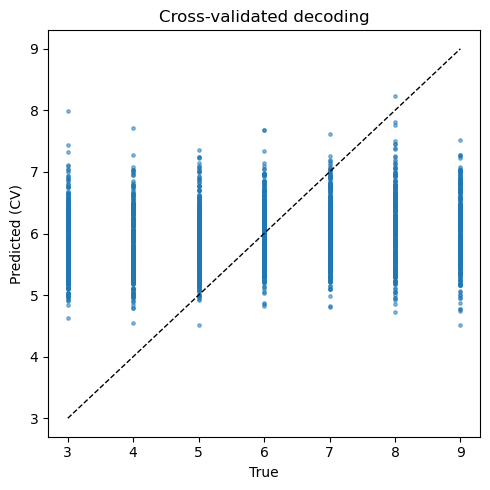

new_segment
CV R^2: 0.198 | RMSE: 97.423
R: 0.446


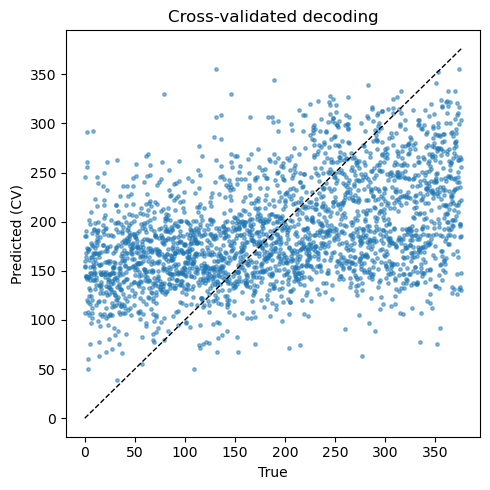

whether_test
CV R^2: -0.057 | RMSE: 0.503
R: -0.067


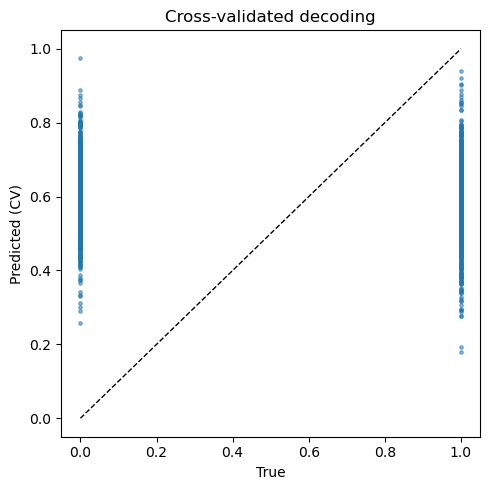

cur_opt_arc_dheading
CV R^2: -0.046 | RMSE: 0.556
R: -0.007


cur_ff_distance
CV R^2: -0.006 | RMSE: 68.925
R: 0.117


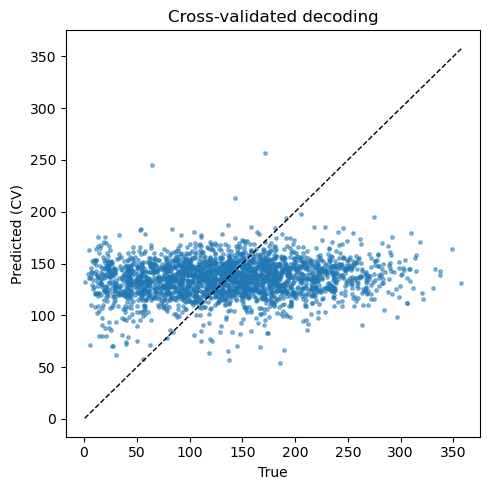

cur_ff_rel_x
CV R^2: -0.046 | RMSE: 43.594
R: -0.010


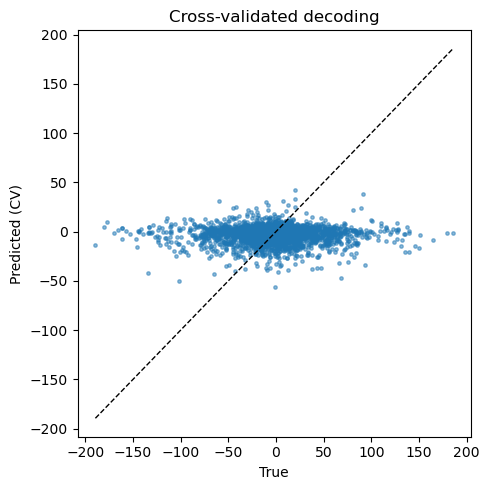

cur_ff_rel_y
CV R^2: -0.006 | RMSE: 67.422
R: 0.119


nxt_ff_rel_x
CV R^2: -0.045 | RMSE: 160.350
R: -0.001


nxt_ff_rel_y
CV R^2: -0.028 | RMSE: 128.481
R: 0.026


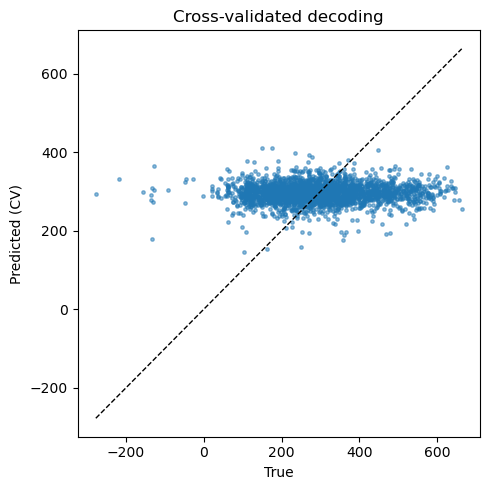

nxt_ff_distance
CV R^2: -0.033 | RMSE: 129.952
R: 0.007


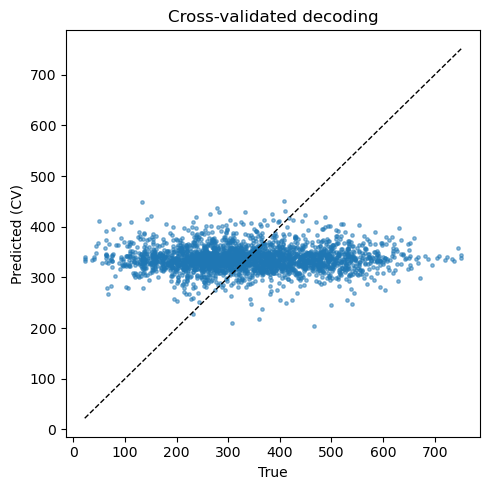

num_ff_visible
CV R^2: -0.016 | RMSE: 1.060
R: 0.041


num_ff_in_memory
CV R^2: -0.035 | RMSE: 2.828
R: -0.005


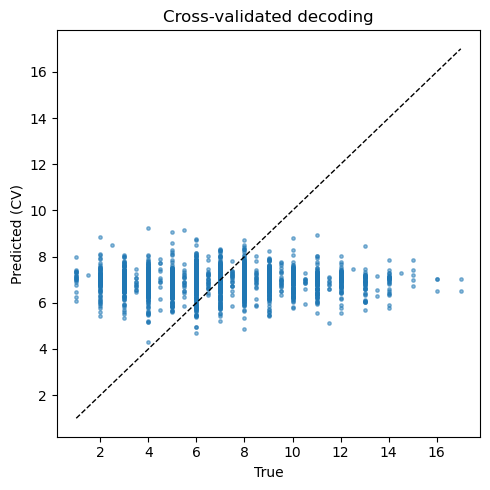

cur_ff_distance_at_ref
CV R^2: 0.004 | RMSE: 71.152
R: 0.141


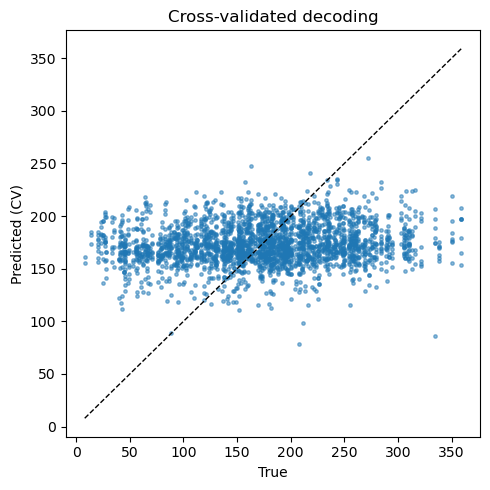

cur_ff_angle_boundary_at_ref
CV R^2: -0.045 | RMSE: 0.275
R: -0.027


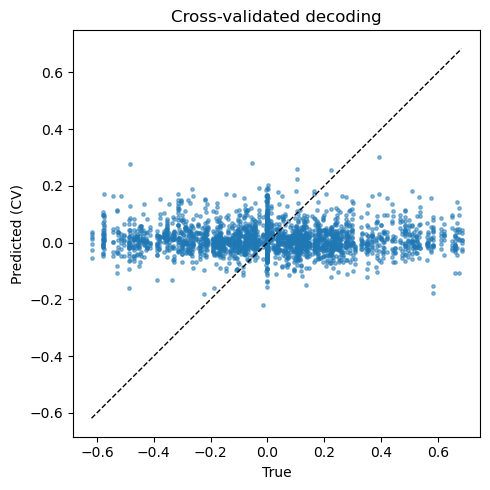

nxt_ff_distance_at_ref
CV R^2: -0.029 | RMSE: 130.428
R: 0.028


ang_speed
CV R^2: -0.033 | RMSE: 0.719
R: -0.005


speed
CV R^2: 0.087 | RMSE: 71.771
R: 0.300


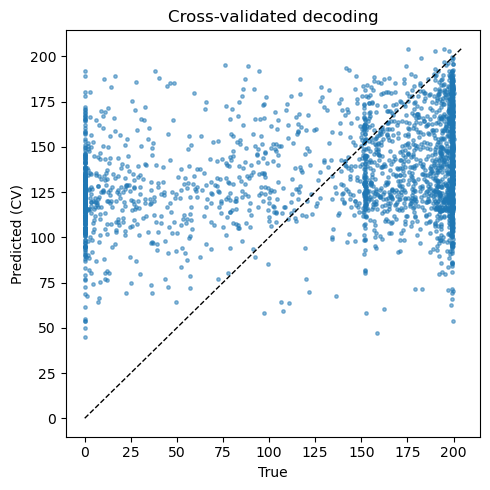

accel
CV R^2: 0.002 | RMSE: 403.992
R: 0.133


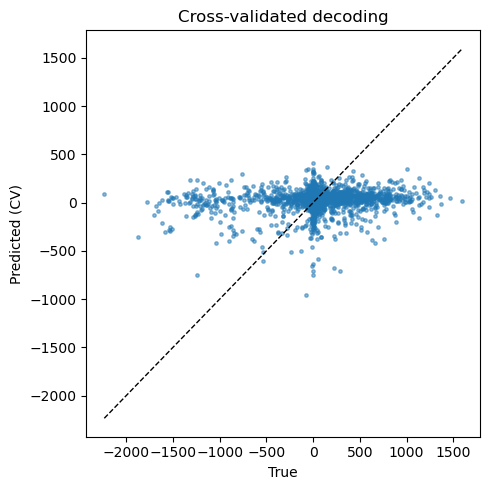

ang_accel
CV R^2: -0.115 | RMSE: 8.568
R: 0.010


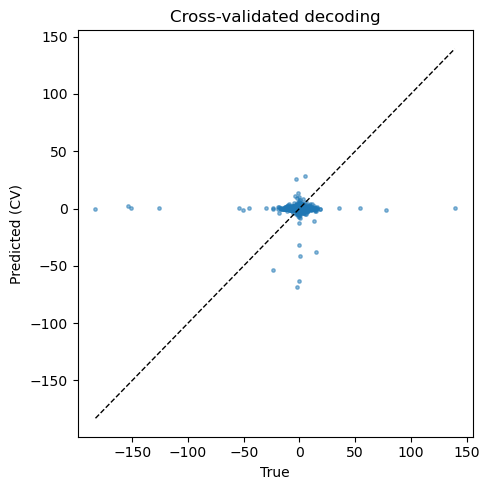

monkey_speeddummy
CV R^2: 0.038 | RMSE: 0.317
R: 0.211


curv_of_traj
CV R^2: -0.023 | RMSE: 0.004
R: 0.033


angle_from_cur_ff_to_nxt_ff
CV R^2: -0.038 | RMSE: 0.505
R: 0.006


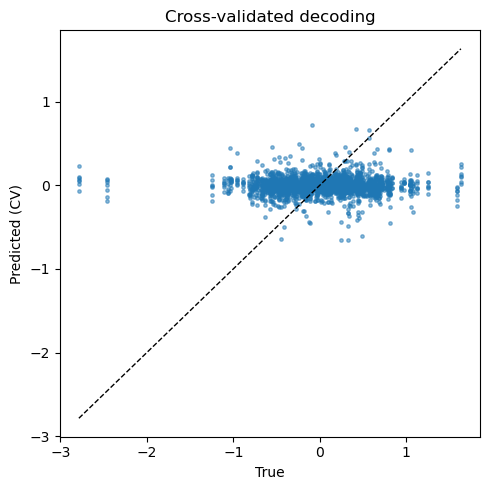

time_since_last_capture
CV R^2: -0.007 | RMSE: 1.857
R: 0.103


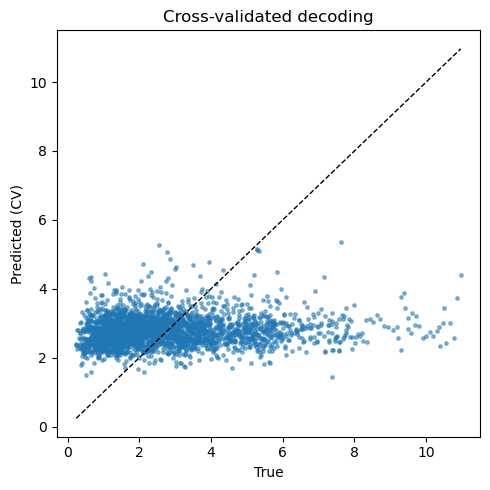

bin_mid_time_rel_to_event
CV R^2: 0.028 | RMSE: 0.197
R: 0.186


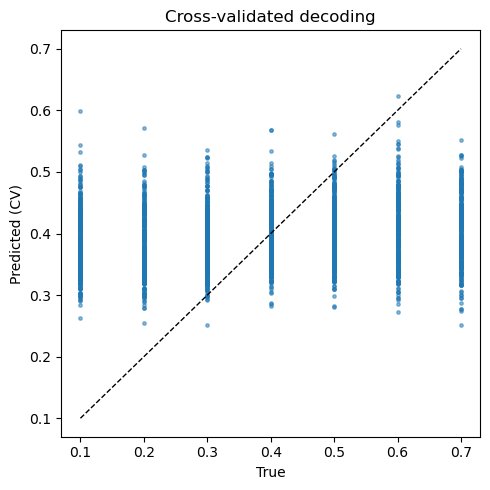

time
CV R^2: 0.202 | RMSE: 897.245
R: 0.451


target_index
CV R^2: 0.201 | RMSE: 338.864
R: 0.449


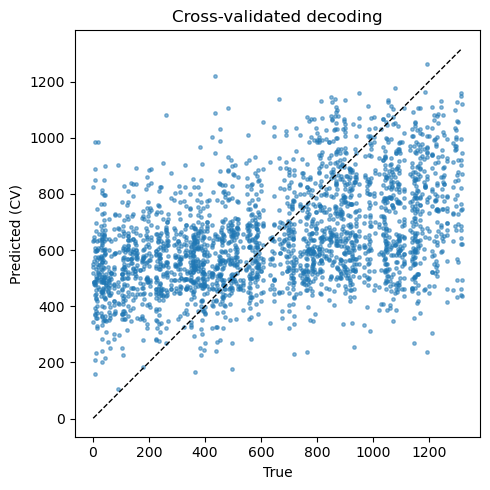

log1p_cur_ff_distance
CV R^2: -0.011 | RMSE: 0.691
R: 0.104


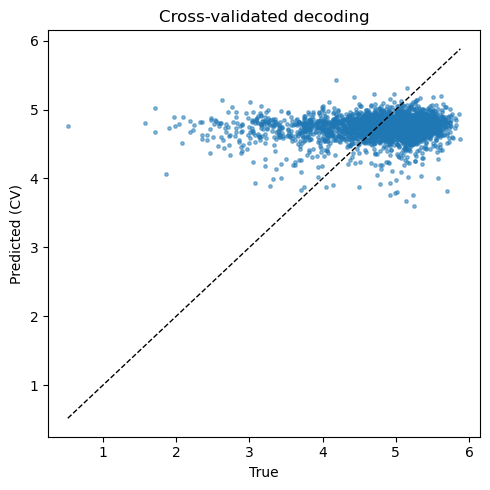

log1p_nxt_ff_distance
CV R^2: -0.039 | RMSE: 0.452
R: -0.006


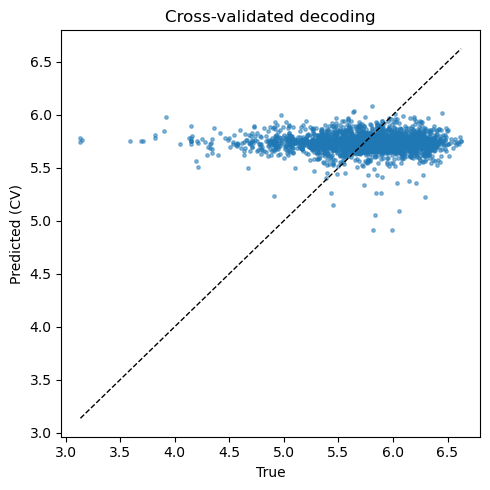

log1p_time_since_last_capture
CV R^2: 0.004 | RMSE: 0.452
R: 0.137


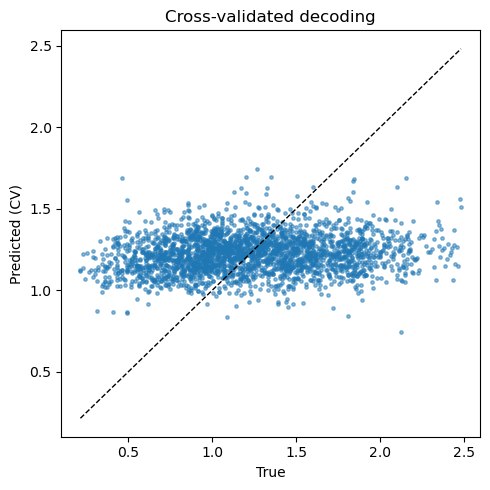

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GroupKFold, cross_val_predict

model = CatBoostRegressor(iterations=300, depth=6, learning_rate=0.05, loss_function='RMSE', verbose=0)

for behav_feature in y_var.columns:
    print(behav_feature)
    y_true = y_var[behav_feature].to_numpy()


    # X, y (1D), no NaNs
    X = np.asarray(x_var)
    y = np.asarray(y_true).ravel()
    ok = np.isfinite(y) & np.all(np.isfinite(X), axis=1)
    X, y = X[ok], y[ok]

    gcv = GroupKFold(n_splits=5)
    y_cv_pred = cross_val_predict(model, X, y, cv=gcv.split(X, y, groups=y_var['new_segment'].values), method='predict')

    # Metrics (no squared=False needed)
    r2 = r2_score(y, y_cv_pred)
    rmse = np.sqrt(mean_squared_error(y, y_cv_pred))
    print('CV R^2: {:.3f} | RMSE: {:.3f}'.format(r2, rmse))

    # also print R
    r = np.corrcoef(y, y_cv_pred)[0, 1]
    print('R: {:.3f}'.format(r))

    # Scatter with unity line
    lo = float(min(y.min(), y_cv_pred.min()))
    hi = float(max(y.max(), y_cv_pred.max()))
    plt.figure(figsize=(5, 5))
    plt.scatter(y, y_cv_pred, s=6, alpha=0.5)
    plt.plot([lo, hi], [lo, hi], 'k--', linewidth=1)
    plt.xlabel('True')
    plt.ylabel('Predicted (CV)')
    plt.title('Cross-validated decoding')
    plt.tight_layout()
    plt.show()


## point-wise segment regressions

In [ ]:
pn.retrieve_or_make_time_resolved_cv_scores_gpfa(latent_dimensionality=7, exists_ok=False)

Number of features to regress on: 26
2025-09-14 21:25:37,516 - INFO - Fold 1 | Train segments: 282 | Test segments: 71


Initializing parameters using factor analysis...

Fitting GPFA model...
2025-09-14 21:26:23,869 - INFO - Fold 2 | Train segments: 282 | Test segments: 71
Initializing parameters using factor analysis...

Fitting GPFA model...
2025-09-14 21:27:06,365 - INFO - Fold 3 | Train segments: 282 | Test segments: 71
Initializing parameters using factor analysis...

Fitting GPFA model...
2025-09-14 21:27:48,241 - INFO - Fold 4 | Train segments: 283 | Test segments: 70
Initializing parameters using factor analysis...

Fitting GPFA model...
2025-09-14 21:28:29,884 - INFO - Fold 5 | Train segments: 283 | Test segments: 70
Initializing parameters using factor analysis...

Fitting GPFA model...
Saved time_resolved_cv_scores_gpfa to all_monkey_data/planning_and_neural/monkey_Bruno/data_0330/event_aligned/time_resolved_cv_scores_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv


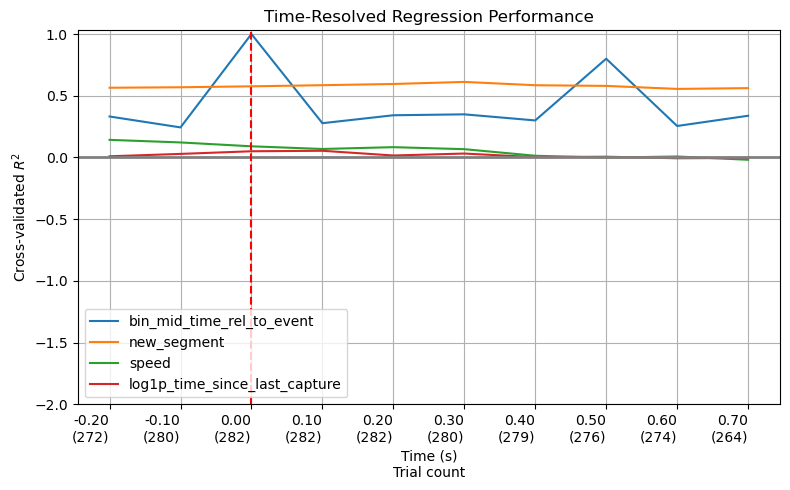

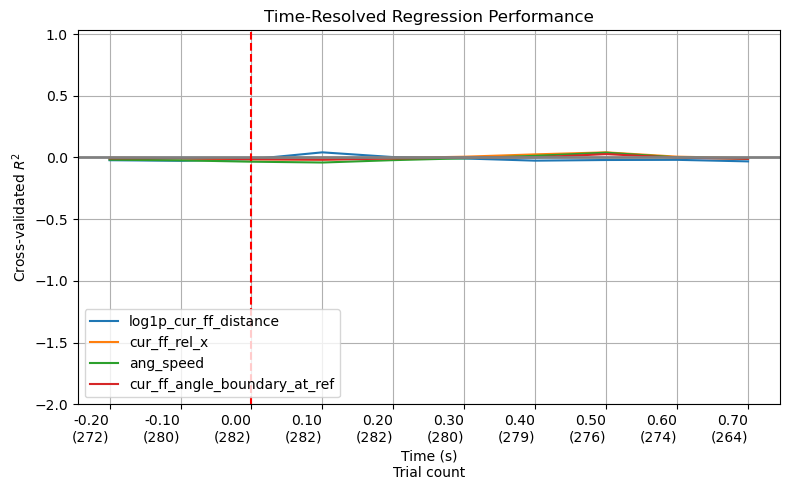

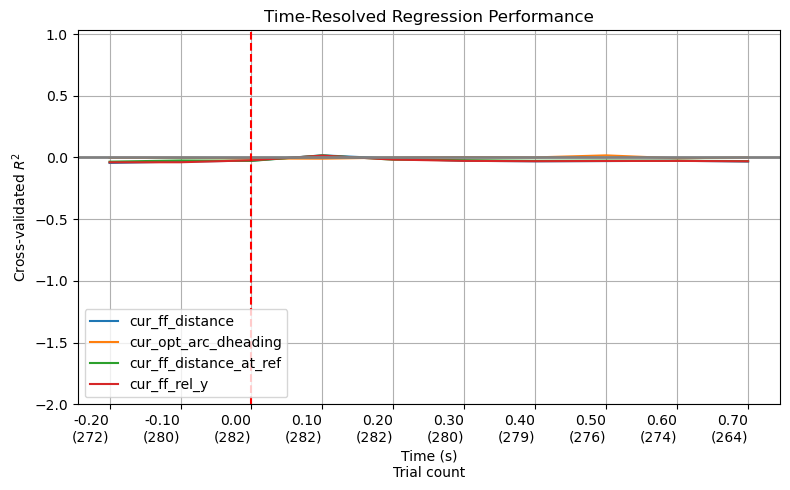

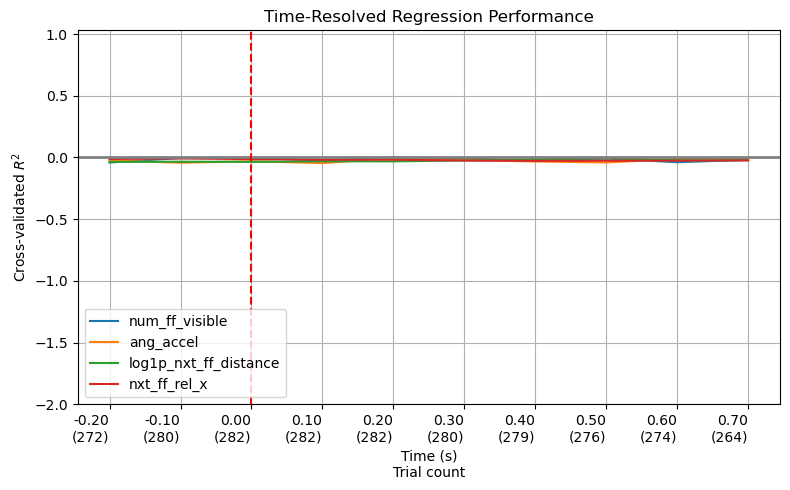

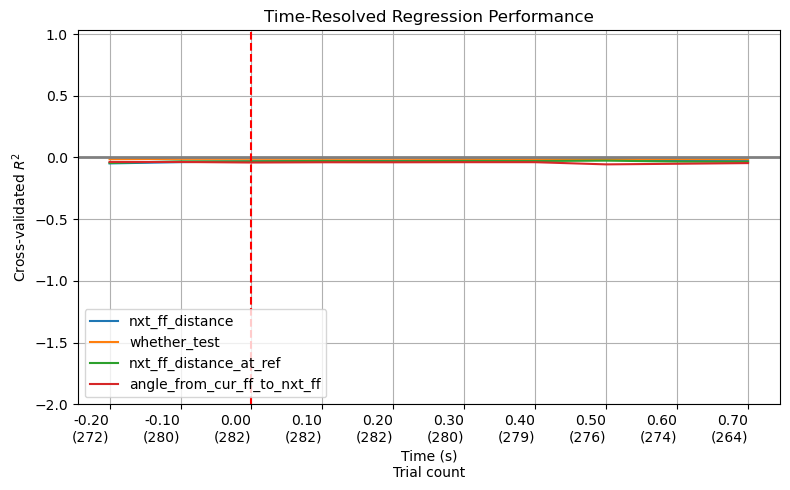

In [ ]:
pn.plot_time_resolved_regression(time_resolved_cv_scores = pn.time_resolved_cv_scores_gpfa)

In [ ]:
stop!

SyntaxError: invalid syntax (3319058519.py, line 1)

In [ ]:
pn.time_resolved_cv_scores_gpfa['trial_count'] = pn.time_resolved_cv_scores_gpfa['train_trial_count'].astype(int)
# features_to_plot = None
features_to_plot=['time_rel_to_stop', 'cur_ff_distance', 'cur_ff_distance_at_ref', 'time_since_last_capture']
pn.plot_time_resolved_regression(time_resolved_cv_scores = pn.time_resolved_cv_scores_gpfa, features_to_plot=features_to_plot)

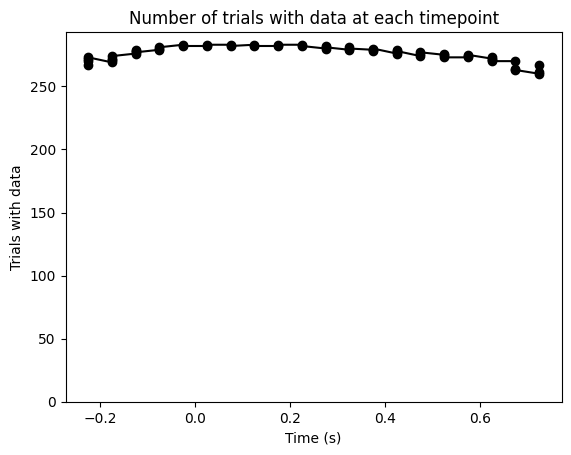

In [ ]:
plot_time_resolved_regression.plot_trial_counts_by_timepoint(
            pn.time_resolved_cv_scores_gpfa, 'trial_count')

In [ ]:
pn.concat_behav_trials[features_to_plot].corr()

time_rel_to_stop  cur_ff_distance  \
time_rel_to_stop                  1.00000          0.82724   
cur_ff_distance                   0.82724          1.00000   
cur_ff_distance_at_ref            0.64263          0.84593   
time_since_last_capture          -0.32107         -0.24940   

                         cur_ff_distance_at_ref  time_since_last_capture  
time_rel_to_stop                        0.64263                 -0.32107  
cur_ff_distance                         0.84593                 -0.24940  
cur_ff_distance_at_ref                  1.00000                 -0.20649  
time_since_last_capture                -0.20649                  1.00000

## point-wise segment regression (for ppt)

In [ ]:
pn.make_time_resolved_cv_scores()

Timepoints: 100%|██████████| 20/20 [00:50<00:00,  2.55s/it]


In [ ]:

features_to_plot = [
'time', 'time_rel_to_stop',
'target_distance',
'target_angle',
'target_rel_x',
'target_rel_y',
'speed',
'stop']

pn.time_resolved_cv_scores.loc[pn.time_resolved_cv_scores['feature'] == 'monkey_speeddummy', 'feature'] = 'stop'
pn.plot_time_resolved_regression(features_to_plot=features_to_plot, n_behaviors_per_plot=8)




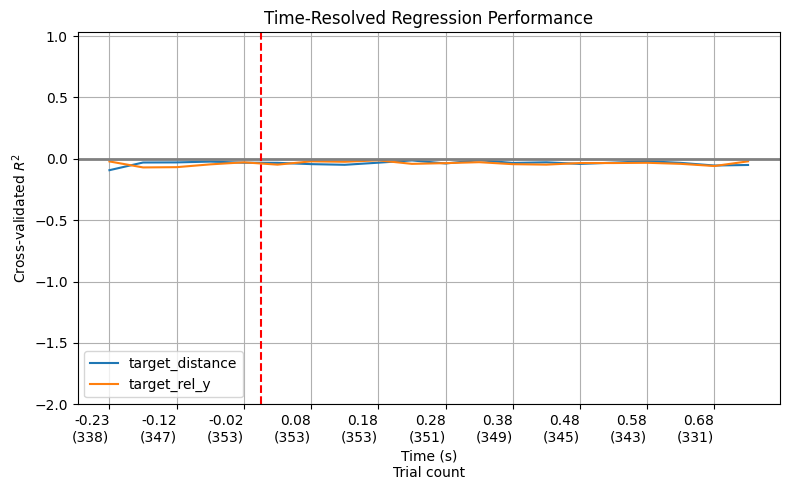

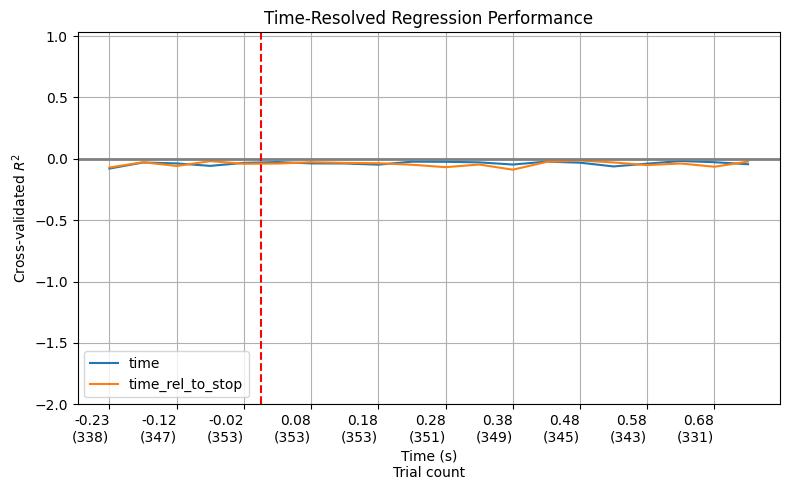

In [ ]:
pn.time_resolved_cv_scores.loc[pn.time_resolved_cv_scores['feature'] == 'monkey_speeddummy', 'feature'] = 'stop'
for features in [['target_distance', 'target_rel_y'],
                 ['target_rel_x', 'target_angle'],
                 ['time', 'time_rel_to_stop'],
                 ['speed', 'stop']]:
    
    pn.plot_time_resolved_regression(features_to_plot=features)




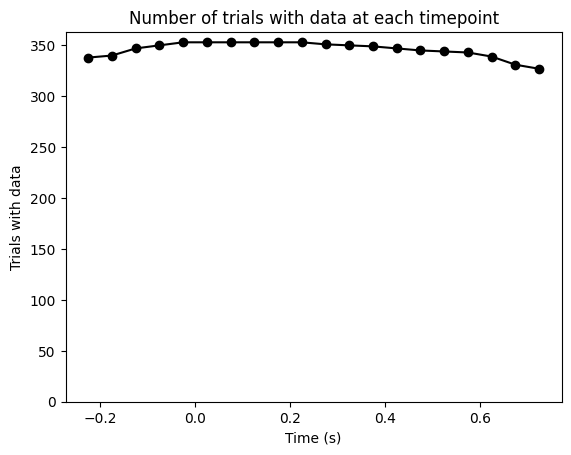

In [ ]:
pn.plot_trial_counts_by_timepoint()  # 

## point-wise segment regression

In [ ]:
pn.prepare_seg_aligned_data()
pn.get_gpfa_traj(latent_dimensionality=7, exists_ok=True)

use_raw_spike_data_instead = False
use_lagged_rebinned_behav_data = False
pn.get_concat_data_for_regression(use_raw_spike_data_instead=use_raw_spike_data_instead,
                                  use_lagged_rebinned_behav_data=use_lagged_rebinned_behav_data,
                                  apply_pca_on_raw_spike_data=True,
                                  use_lagged_raw_spike_data=False,) 

new_seg_duration is now 1.0, and post_event_window is now 0.75
Loaded new_seg_info from all_monkey_data/planning_and_neural/monkey_Bruno/data_0330/new_seg_info/tlim2_cur_first_pre0p25_post0p75.csv
Dropped 43 columns due to containing NA in rebinned_y_var via calling drop_na_cols function: ['cur_opt_arc_curv', 'cur_cntr_arc_curv', 'nxt_cntr_arc_curv', 'nxt_opt_arc_curv', 'cur_opt_arc_end_heading', 'angle_opt_cur_end_to_nxt_ff', 'angle_from_stop_to_nxt_ff', 'diff_in_angle_to_nxt_ff', 'diff_in_abs_angle_to_nxt_ff', 'traj_curv_to_stop', 'curv_from_stop_to_nxt_ff', 'opt_curv_to_cur_ff', 'curv_from_cur_end_to_nxt_ff', 'd_curv_null_arc', 'd_curv_monkey', 'abs_d_curv_null_arc', 'abs_d_curv_monkey', 'diff_in_d_curv', 'diff_in_abs_d_curv', 'abs_angle_opt_cur_end_to_nxt_ff', 'abs_angle_from_stop_to_nxt_ff', 'abs_diff_in_angle_to_nxt_ff', 'abs_diff_in_abs_angle_to_nxt_ff', 'd_heading_since_target_last_seen', 'cum_distance_when_target_last_seen', 'target_last_seen_angle', 'monkey_x_target_last_seen

In [ ]:
pn.retrieve_or_make_time_resolved_cv_scores()

File all_monkey_data/planning_and_neural/monkey_Bruno/data_0330/event_aligned/time_resolved_cv_scores/precomputed_gpfa/scores_b0p05_t2_cur_first_p0p25_po0p75_d7_cv5.csv does not exist. Recomputing...


Timepoints: 100%|██████████| 20/20 [00:31<00:00,  1.59s/it]

Saved time_resolved_cv_scores to all_monkey_data/planning_and_neural/monkey_Bruno/data_0330/event_aligned/time_resolved_cv_scores/precomputed_gpfa/scores_b0p05_t2_cur_first_p0p25_po0p75_d7_cv5.csv


### plot some

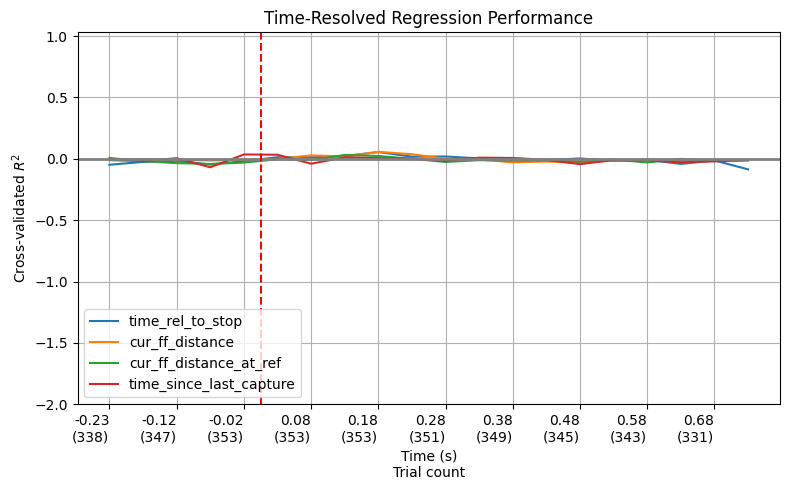

In [ ]:
pn.plot_time_resolved_regression(features_to_plot=['time_rel_to_stop', 'cur_ff_distance', 'cur_ff_distance_at_ref', 'time_since_last_capture'])

### plot all

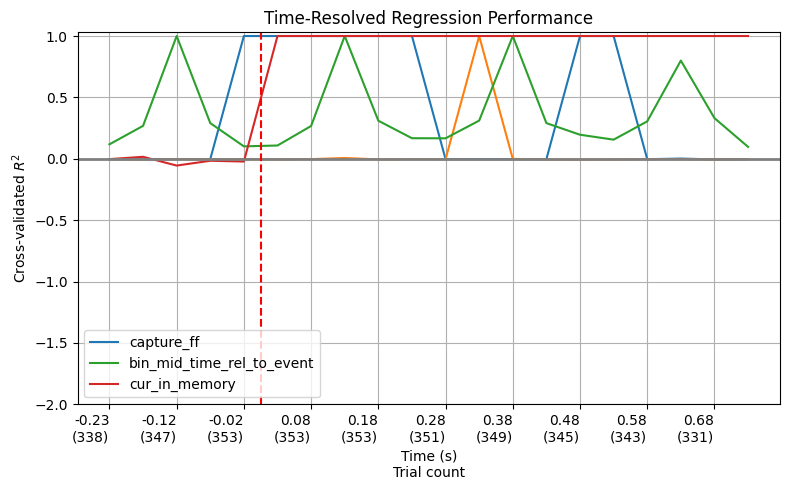

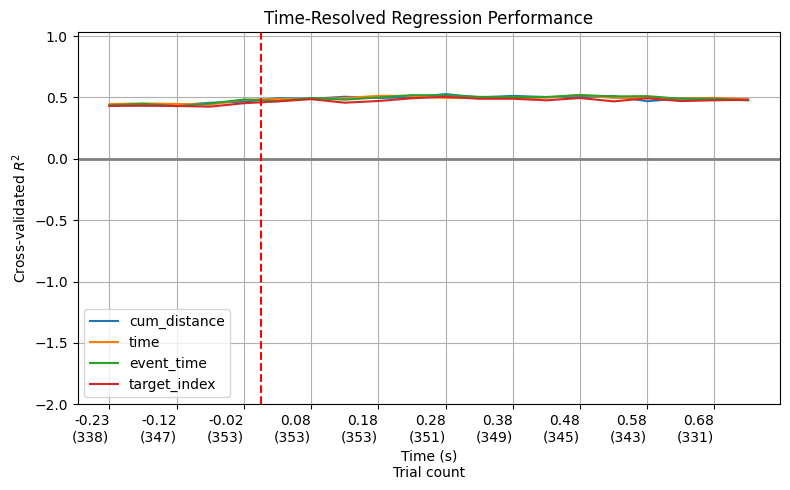

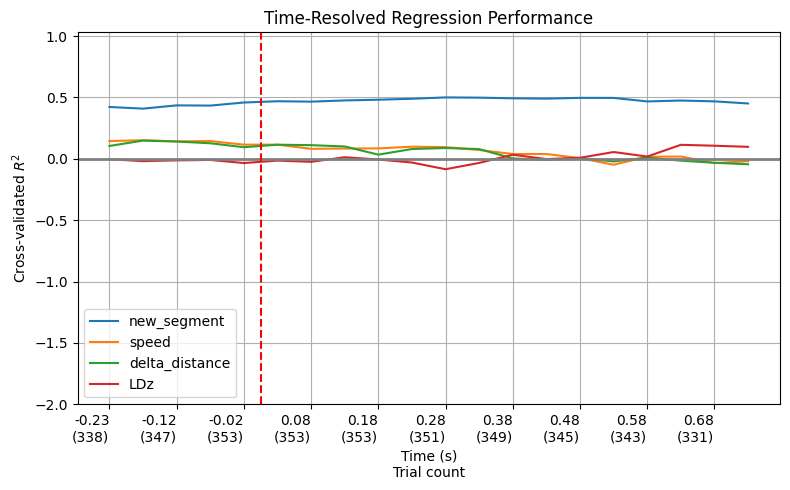

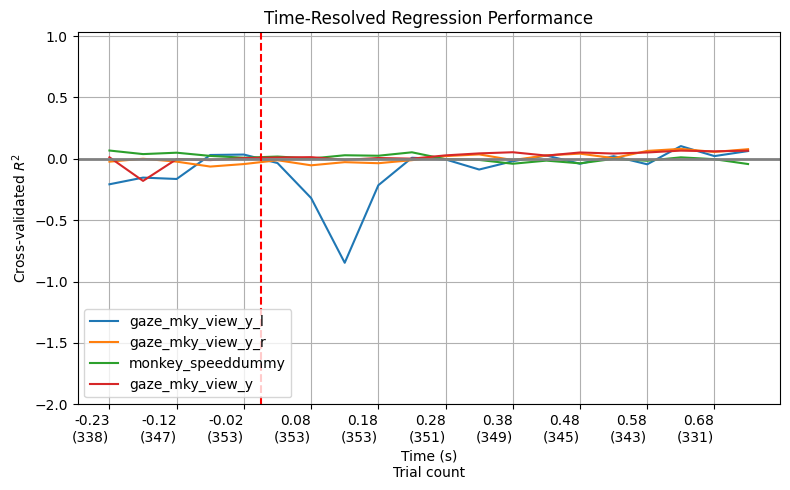

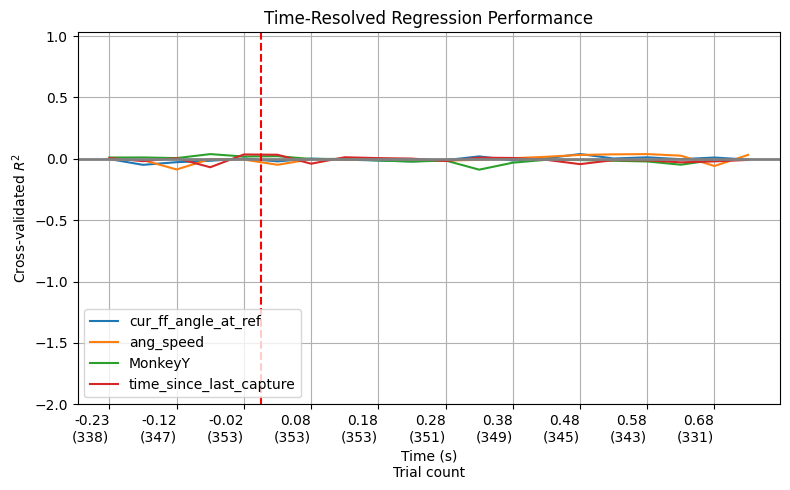

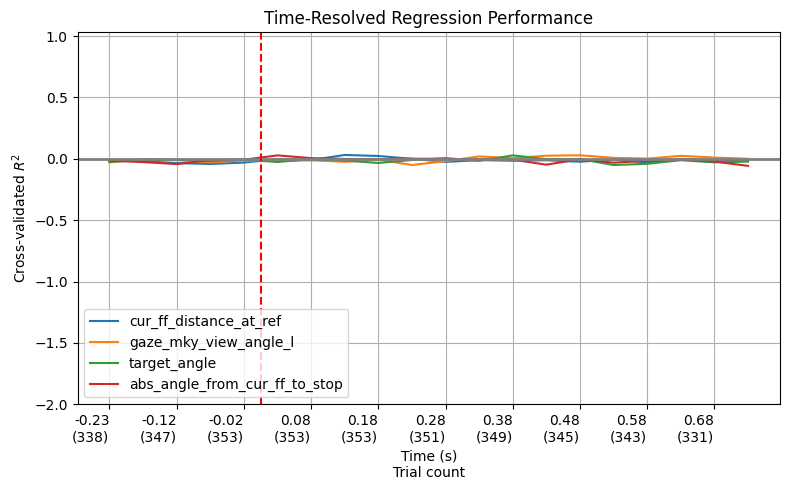

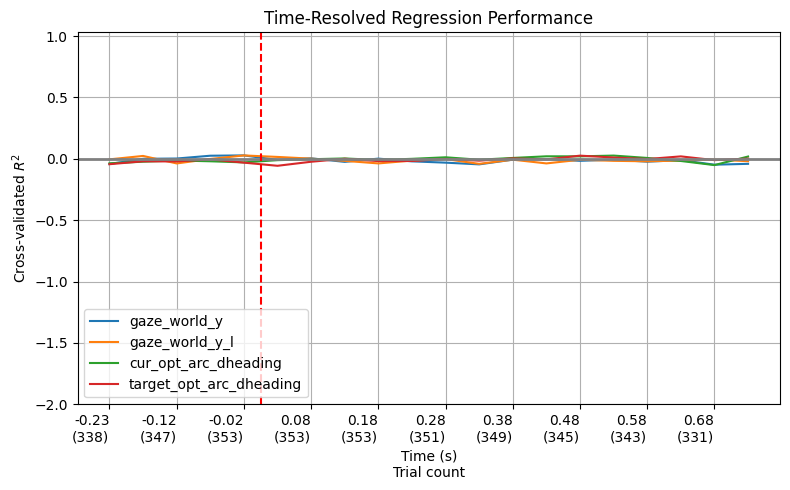

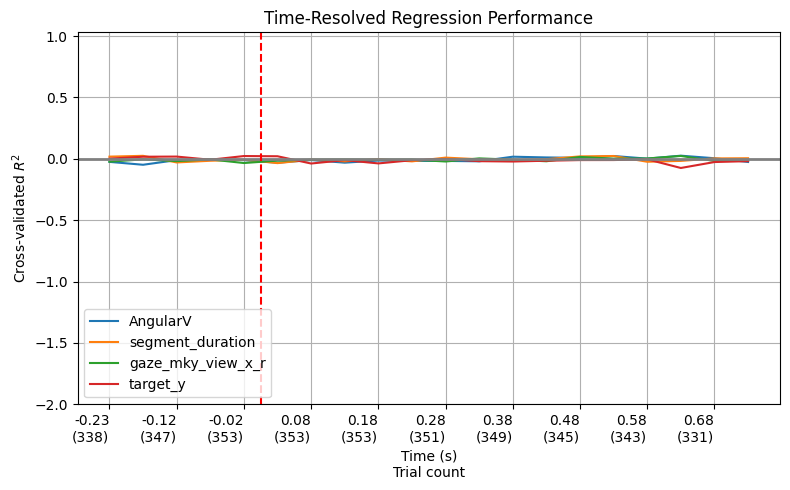

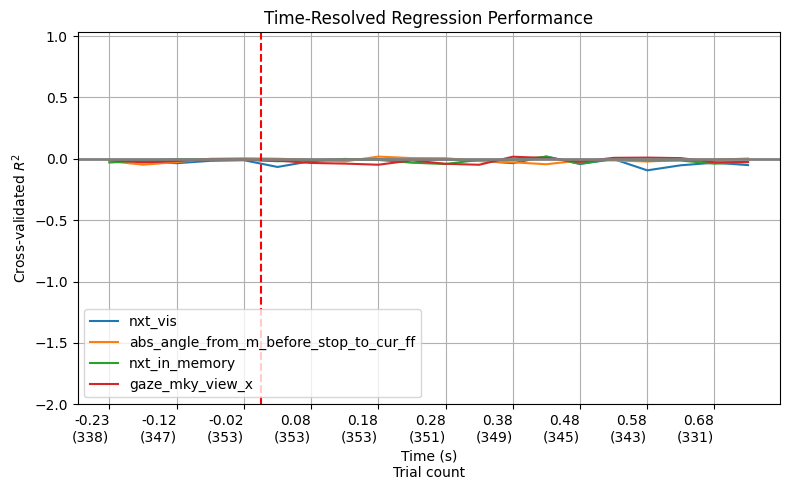

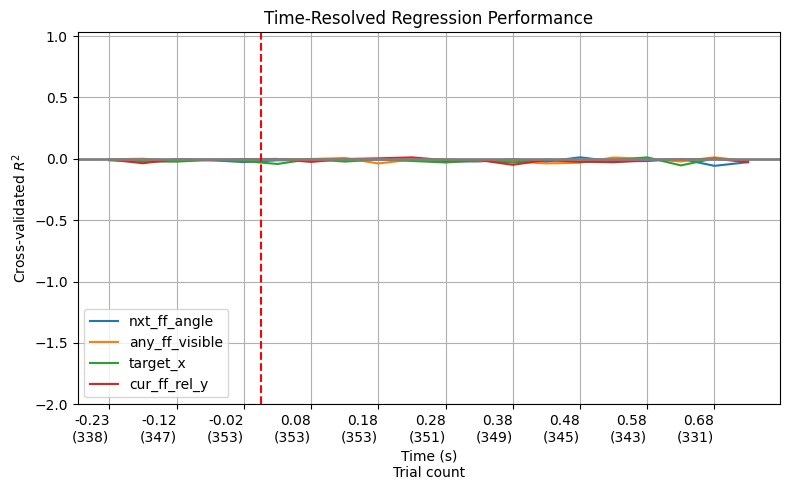

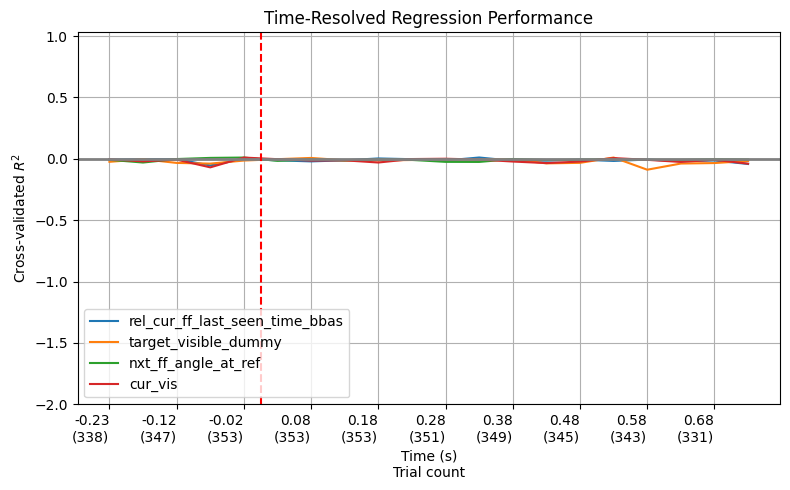

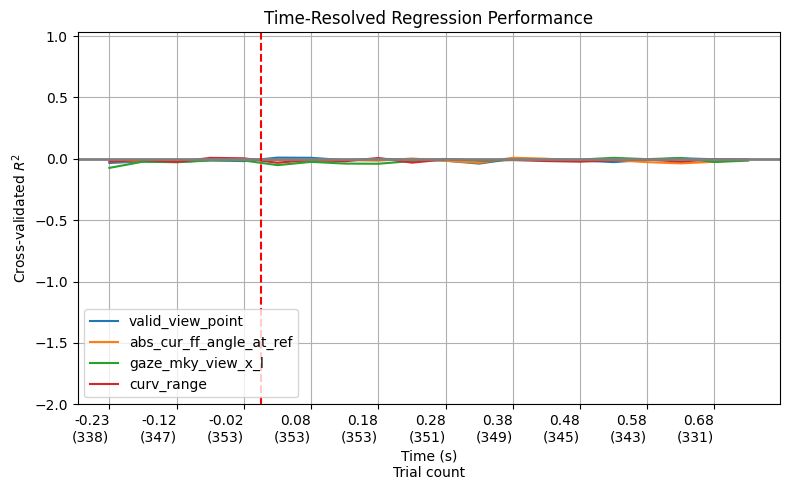

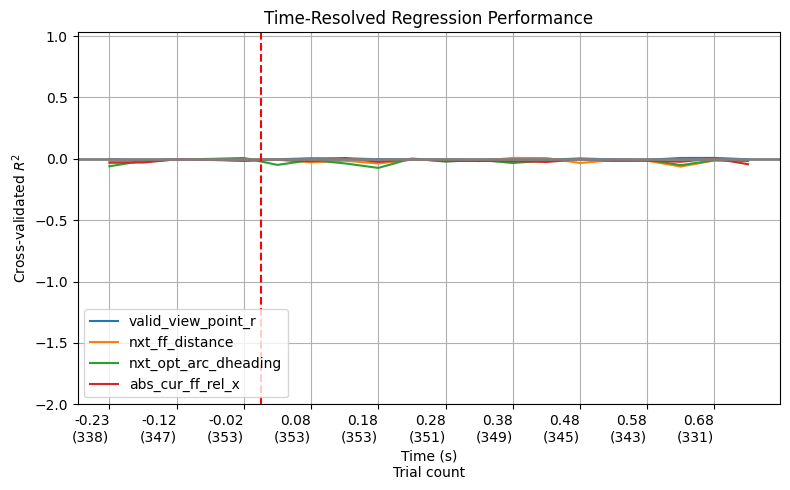

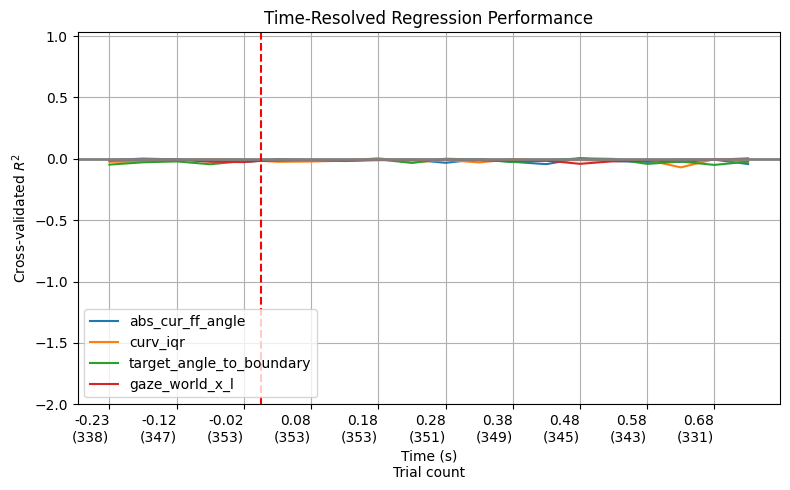

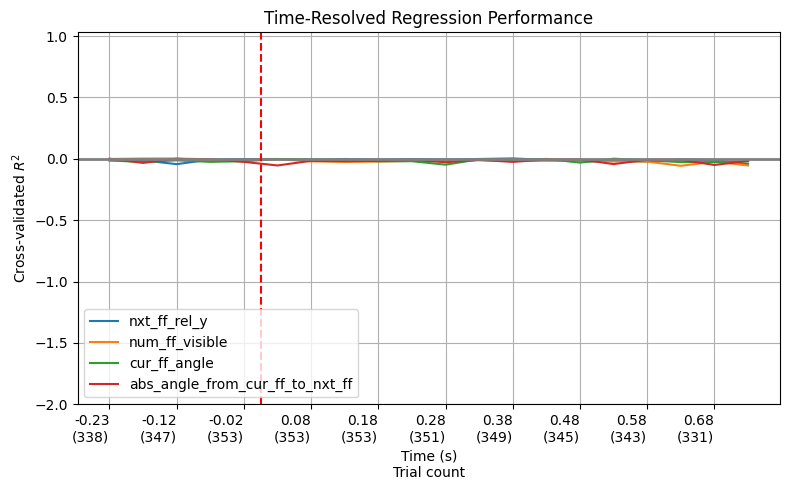

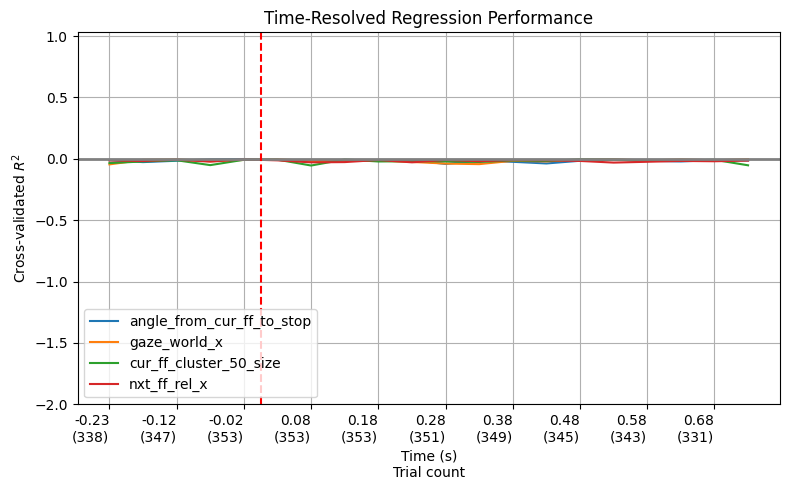

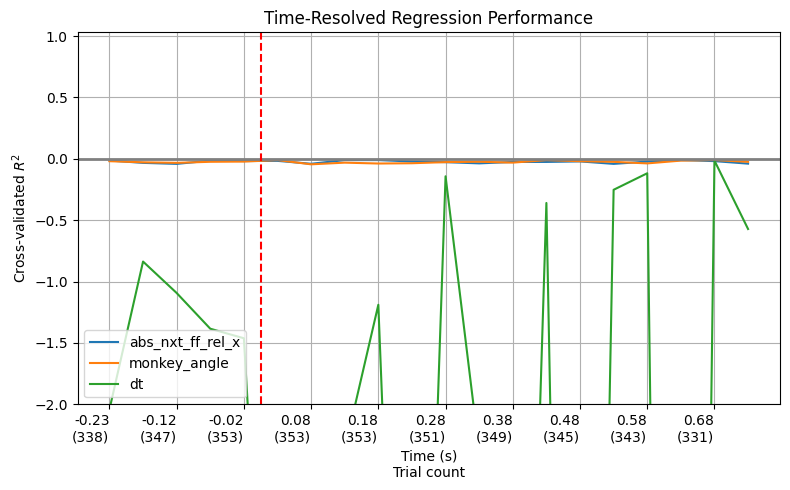

In [ ]:
pn.plot_time_resolved_regression()

## compare cv score: GPFA Inside vs Outside CV Loop


### one feature

In [ ]:
feature = 'event_time'
new_cv_scores = pd.concat([pn.time_resolved_cv_scores[['new_bin', 'bin_mid_time', 'trial_count', feature]], 
                           pn.time_resolved_cv_scores_gpfa[[feature]].rename(columns={feature: f'{feature}_cv_w_gpfa'})], axis=1)
pn.plot_time_resolved_regression(time_resolved_cv_scores=new_cv_scores, score_threshold_to_plot=None,
                                 rank_by_max_score=False)

KeyError: "['event_time'] not in index"

### all features

In [ ]:
ranked_features = pn.time_resolved_cv_scores.max().sort_values(ascending=False).index.values
features_not_to_plot = ['new_bin', 'new_seg_duration', 'trial_count', 'bin_mid_time']
ranked_features = [feature for feature in ranked_features if feature not in features_not_to_plot]
for feature in ranked_features:
    print(feature)
    print('='*100)
    new_cv_scores = pd.concat([pn.time_resolved_cv_scores[['new_bin', 'bin_mid_time', 'trial_count', feature]], 
                            pn.time_resolved_cv_scores_gpfa[[feature]].rename(columns={feature: f'{feature}_cv_w_gpfa'})], axis=1)
    pn.plot_time_resolved_regression(time_resolved_cv_scores=new_cv_scores, score_threshold_to_plot=None,
                                        rank_by_max_score=False)

## trial count per time point

In [ ]:
pn.plot_trial_counts_by_timepoint()

## Concat: segment split regress CV

### all data

In [ ]:
mask = pn.concat_behav_trials['bin_mid_time_rel_to_event'] > 0
pn.concat_behav_trials = pn.concat_behav_trials[mask]
pn.concat_neural_trials = pn.concat_neural_trials[mask]

print(pn.concat_neural_trials.shape)
print(pn.concat_behav_trials.shape)


(2425, 18)
(2425, 29)


In [ ]:
# columns_of_interest = [    'time', 'time_rel_to_stop',
#     'target_distance',
# 'target_angle',
# 'target_rel_x',
# 'target_rel_y',
# 'speed',
# 'stop']

columns_of_interest = pn.concat_behav_trials.columns

In [ ]:

#Just 'both'

all_results = []
for test_or_control in ['both']:
    x_var, y_var = pn.get_concat_x_and_y_var_for_lr(test_or_control=test_or_control)
    
    #y_var['stop'] = y_var['monkey_speeddummy'].astype(int)
    
    results_summary = ml_methods_utils.run_segment_split_regression_cv(
        x_var, 
        y_var, 
        columns_of_interest, 
        num_folds=5, 
    )
    results_summary['test_or_control'] = test_or_control
    all_results.append(results_summary)

all_results = pd.concat(all_results)
all_results.head()

reg_results = all_results[all_results['Model'] == 'Linear Regression']
class_results = all_results[all_results['Model'] == 'Logistic Regression']


import matplotlib.pyplot as plt

df = reg_results.copy()

# Filter only test_r2 rows
df_test_r2 = df[df["Metric"] == "test_r2"]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(df_test_r2["Feature"], df_test_r2["mean"], 
        yerr=df_test_r2["Std"], capsize=4, color="skyblue", edgecolor="k")

plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Test R² (Mean ± Std)")
plt.title("Schro: Test R² on Data Combined From All Segments")
plt.tight_layout()
plt.show()


test_or_control: both
x_var dimensions: (2425, 16)
y_var dimensions: (2425, 29)
Error in logistic regression CV for whether_test: name 'cross_validate' is not defined. Will skip this target.


### test vs control vs both

In [ ]:
# pn.get_concat_data_for_regression(use_raw_spike_data_instead=False,
#                                     apply_pca_on_raw_spike_data=False,
#                                     use_lagged_raw_spike_data=False,) 



In [ ]:
mask = pn.concat_behav_trials['bin_mid_time_rel_to_event'] > 0
pn.concat_behav_trials = pn.concat_behav_trials[mask]
pn.concat_neural_trials = pn.concat_neural_trials[mask]

print(pn.concat_neural_trials.shape)
print(pn.concat_behav_trials.shape)

pn.separate_test_and_control_data()

(2425, 18)
(2425, 29)


In [ ]:
# columns_of_interest = ['whether_test', 'cur_ff_distance', 'cur_ff_angle', 'nxt_ff_distance', 'nxt_ff_rel_y', 'nxt_opt_arc_dheading', 'nxt_ff_rel_x', 'nxt_ff_angle', 'nxt_ff_angle_at_ref']
columns_of_interest = pn.concat_behav_trials.columns

In [ ]:
all_results = []
for test_or_control in ['test', 'control', 'both']:
    x_var, y_var = pn.get_concat_x_and_y_var_for_lr(test_or_control=test_or_control)
    
    results_summary = ml_methods_utils.run_segment_split_regression_cv(
        x_var, 
        y_var, 
        columns_of_interest, 
        num_folds=5, 
    )
    results_summary['test_or_control'] = test_or_control
    all_results.append(results_summary)

all_results = pd.concat(all_results)
all_results.head()

reg_results = all_results[all_results['Model'] == 'Linear Regression']
class_results = all_results[all_results['Model'] == 'Logistic Regression']

test_or_control: test
x_var dimensions: (1421, 16)
y_var dimensions: (1421, 29)


test_or_control: control
x_var dimensions: (1004, 16)
y_var dimensions: (1004, 29)
test_or_control: both
x_var dimensions: (2425, 16)
y_var dimensions: (2425, 29)
Error in logistic regression CV for whether_test: name 'cross_validate' is not defined. Will skip this target.


### plot all

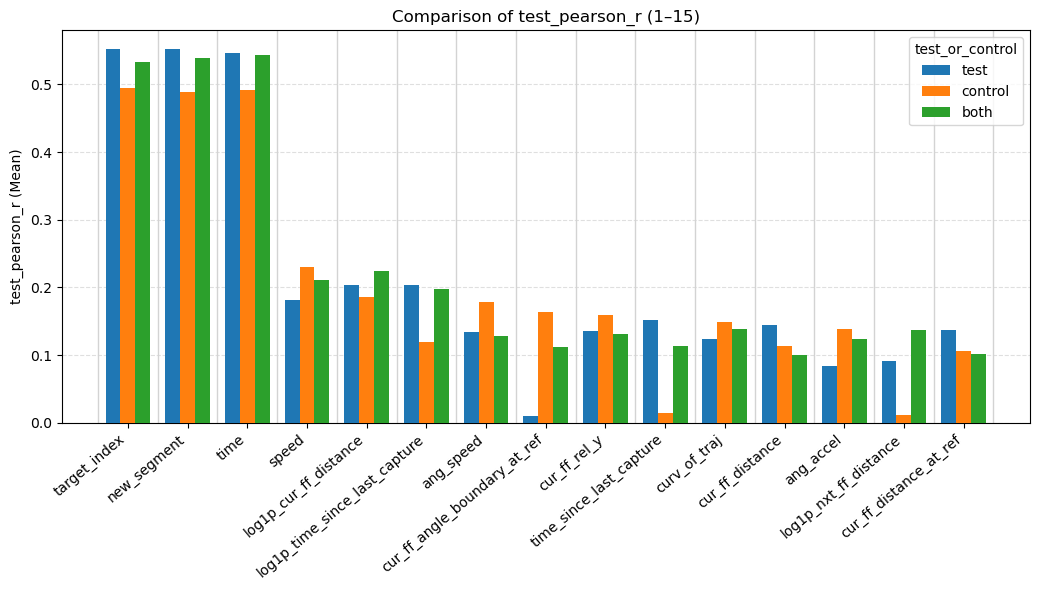

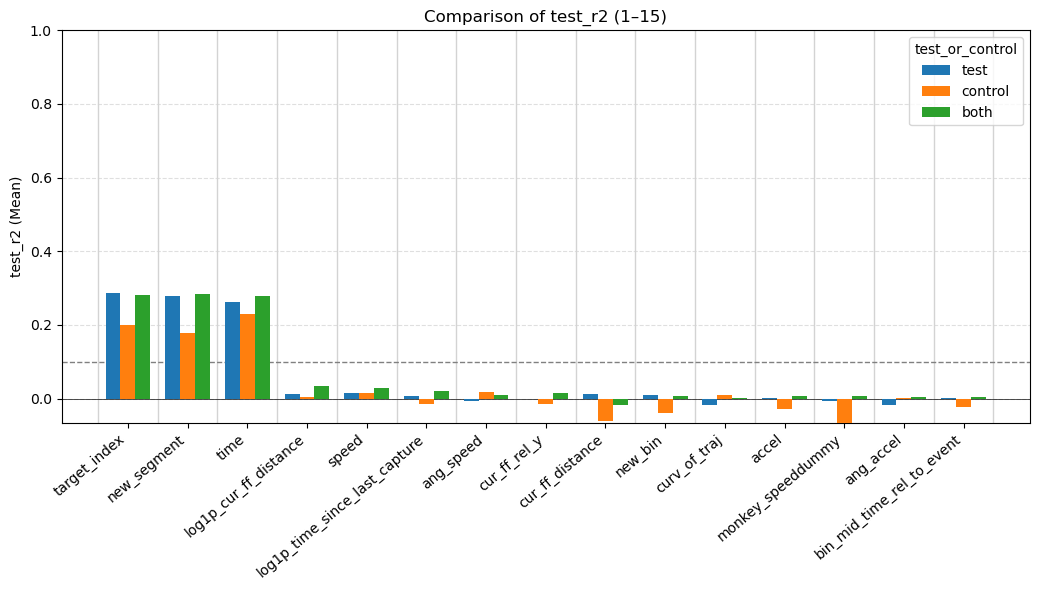

In [ ]:
# regression results
for metric in ['test_r2', 'test_pearson_r']:
    ml_methods_utils.make_barplot_to_compare_results(
            reg_results, 
            metric=metric, 
            #features=['bin_mid_time_rel_to_event'],
        )
    print('='*100)
    print('='*100)

In [ ]:
df = reg_results[(reg_results['Metric'] == 'train_r2') & (reg_results['mean'] > 0) & (reg_results['test_or_control'] == 'both')].sort_values(by='mean', ascending=False).reset_index(drop=True)

In [ ]:
'time', 'event_time'

In [ ]:
'cum_distance', 'target_index'

In [ ]:
# The following columns will be dropped, since ['time', 'event_time', 'cum_distance', 'target_index', 'new_segment'] are enough, and the rest have high correlation with them
columns_to_drop = ['point_index', 'last_target_caught_time', 
                'new_seg_end_time', 'new_seg_start_time', 'stop_point_index',
                'current_target_caught_time', 'stop_time', 'seg_end_time',
                'seg_start_time', 'cur_ff_index', 'trial',
                'nxt_ff_index', 'segment']


In [ ]:
features = df[df['mean'] > 0.2].Feature.values
df2 = pn.concat_behav_trials[features]
df2.corr()


In [ ]:
df[df['mean'] > 0.23]

In [ ]:
reg_results[(reg_results['Metric'] == 'test_r2') & (reg_results['mean'] > 0) & (reg_results['test_or_control'] == 'both')]

In [ ]:
# classification results
for metric in ['test_accuracy']:
    ml_methods_utils.make_barplot_to_compare_results(
        class_results, 
        metric=metric, 
    )

### plot some

In [ ]:
# regression results
for metric in ['test_pearson_r', 'test_r2']:
# for metric in ['train_r2_Mean', 'train_pearson_r_Mean']:
    ml_methods_utils.make_barplot_to_compare_results(
            reg_results, 
            metric=metric, 
            features=['cur_ff_distance', 'cur_ff_angle', 'cur_ff_rel_x', 'cur_ff_rel_y', 'abs_cur_ff_angle', 'abs_cur_ff_rel_x',
                      'nxt_ff_distance', 'nxt_ff_angle', 'nxt_ff_rel_x', 'nxt_ff_rel_y', 'abs_nxt_ff_angle', 'abs_nxt_ff_rel_x',
                      'time_rel_to_stop', 'time_since_last_capture'],
        )
    print('='*100)
    print('='*100)

## segment split regress train-test
Warning: results can be very unstable due to the stochasticity of train-test split

In [ ]:
x_var = pn.concat_neural_trials
y_var = pn.concat_behav_trials

columns_of_interest = ['nxt_ff_rel_y', 'nxt_opt_arc_dheading', 'nxt_ff_rel_x', 'nxt_ff_angle', 'nxt_ff_angle_at_ref']
ml_methods_utils.run_segment_split_regression(x_var, y_var, columns_of_interest)

## plot latent dimensions

In [ ]:
raw_data_folder_path

In [ ]:
plot_gpfa_utils.plot_gpfa_traj_3d_timecolored_average(pn.trajectories)


In [ ]:
plot_gpfa_utils.plot_gpfa_traj_3d_uniform_color(pn.trajectories)


In [ ]:
# First, enable interactive mode in your notebook
%matplotlib inline

# Import required modules
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Create the interactive plot
fig, ax = plot_gpfa_utils.plot_gpfa_traj_3d(
    trajectories=pn.trajectories,
    figsize=(15, 5),
    linewidth_single_trial=0.75,
    alpha_single_trial=0.3,
    linewidth_trial_average=2,
    title='Latent dynamics extracted by GPFA',
    view_azim=-5,
    view_elev=60
)

plt.show()

In [ ]:
# fig = plot_gpfa_utils.plot_gpfa_traj_3d_plotly(trajectories)

In [ ]:
# Find variance explained by each latent dimension
traj_stack = np.stack(pn.trajectories, axis=0)  # shape: (n_trials, 3, T)
var_by_dim = np.var(traj_stack, axis=(0, 2))    # variance across trials and time
var_by_dim /= var_by_dim.sum()               # normalize to get explained variance ratio
print("Variance explained by each latent dimension:", var_by_dim)


In [ ]:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(15, 5))

ax.set_title('Latent dynamics extracted by GPFA')
ax.set_xlabel('Time [s]')

average_trajectory = np.mean(pn.trajectories, axis=0)
time = np.arange(len(average_trajectory[0])) * pn.bin_width  # assuming all trajectories have the same length

for i, x in enumerate(average_trajectory):
    ax.plot(time, x, label=f'Dim {i+1}')

ax.legend()

plt.tight_layout()
plt.show()


## check corr between vars

In [ ]:
feature1 = 'new_segment'
feature2 = 'target_index'

from scipy.stats import pearsonr

x = pn.concat_behav_trials[feature1].values
y = pn.concat_behav_trials[feature2].values

r, p = pearsonr(x, y)
print(f"Pearson r: {r:.16f}")

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Extract the data
x = pn.concat_behav_trials[feature1].values.reshape(-1, 1)  # Ensure x is 2D
y = pn.concat_behav_trials[feature2].values          # y can remain 1D

# Fit the linear regression model
model = LinearRegression()
model.fit(x, y)

# Predict y values for the regression line
y_pred = model.predict(x)

# Plot scatter and regression line
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data points', alpha=0.6)
plt.plot(x, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Behavioral Time')
plt.ylabel('Neural Event Time')
plt.title('Linear Regression of Neural vs Behavioral Time')
plt.legend()
plt.grid(True)
plt.show()


## why poor performance?

In [ ]:
stop!

In [ ]:
import neural_data_analysis.neural_analysis_tools.gpfa_methods.time_resolved_regression as time_resolved_regression

# 1. Print number of trials per timepoint
time_resolved_regression.print_trials_per_timepoint(pn.gpfa_neural_trials)

# 2. Check for NaNs
time_resolved_regression.check_for_nans_in_trials(pn.gpfa_neural_trials, name='latent')
time_resolved_regression.check_for_nans_in_trials(pn.behav_trials, name='behavioral')

# 3. Standardize trials
latent_trials_std = time_resolved_regression.standardize_trials(pn.gpfa_neural_trials)
behav_trials_std = time_resolved_regression.standardize_trials(pn.behav_trials)

# 4. Plot latent and behavioral variables for a few trials
time_resolved_regression.plot_latents_and_behav_trials(latent_trials_std, behav_trials_std, pn.bin_width, n_trials=5)


# why time prediction is good

# Appendix

## see rel_cur_ff_first_seen_time distribution

In [ ]:
rel_seen_time_df = pn.planning_data_by_point[['rel_cur_ff_first_seen_time_bbas', 'rel_cur_ff_last_seen_time_bbas']].drop_duplicates().reset_index(drop=True)
sns.histplot(rel_seen_time_df['rel_cur_ff_first_seen_time_bbas'], bins=50, label='cur ff first seen')
sns.histplot(rel_seen_time_df['rel_cur_ff_last_seen_time_bbas'], bins=50, label='cur ff last seen')
plt.xlabel('Time relative to stop (s)')
plt.ylabel('Count')
plt.title('Time relative to stop')
plt.legend()
plt.show()

## debug inconsistent number of new_bins

In [ ]:
# example trajectories
for traj in pn.trajectories[:]:
    print(traj.shape)

In [ ]:
for traj in pn.behav_trials[:]:
    print(traj.shape)


In [ ]:
segments = pn.rebinned_behav_data.groupby('new_segment').size()[pn.rebinned_behav_data.groupby('new_segment').size() < 10].index

In [ ]:
pn.rebinned_behav_data[pn.rebinned_behav_data['new_segment'].isin(segments)]

## exp: to match (new_segment, new_bin) tuples

In [ ]:
reload(pn_aligned_by_event)
reload(gpfa_helper_class)

In [ ]:
pn.prepare_seg_aligned_data(cur_or_nxt='cur', first_or_last='last', time_limit_to_count_sighting=2,
                              pre_event_window=1, post_event_window=0.75, rebinned_max_x_lag_number=2)

In [ ]:
pn.rebinned_y_var.columns

In [ ]:
pn.rebinned_y_var['bin_mid_time_rel_to_event'].unique()

In [ ]:
pn.rebinned_y_var.groupby('new_segment').min()['new_bin'].max()

In [ ]:
pn.rebinned_x_var.groupby('new_segment').min()['new_bin'].max()

In [ ]:
pn.rebinned_y_var.groupby('new_segment').size()

In [ ]:
pn.rebinned_y_var

In [ ]:
# example trajectories
for traj in pn.trajectories[:]:
    print(traj.shape)

In [ ]:
pn.gpfa_neural_trials[0].shape

In [ ]:
pn.get_gpfa_traj(latent_dimensionality=7, exists_ok=False)

In [ ]:
# for regression later
use_raw_spike_data_instead = False

pn.get_concat_data_for_regression(use_raw_spike_data_instead=False,
                                    use_lagged_raw_spike_data=False,
                                    apply_pca_on_raw_spike_data=False,
                                    num_pca_components=7)


pn.print_data_dimensions()

In [ ]:
import pandas as pd
import numpy as np

# Assuming `pn.concat_behav_trials` and `pn.concat_neural_trials` are DataFrames:

# Convert the relevant columns to sets of tuples
behav_set = set(map(tuple, pn.concat_behav_trials[['new_segment', 'new_bin']].values))
neural_set = set(map(tuple, pn.concat_neural_trials[['new_segment', 'new_bin']].values))

# Compute the difference
diff = behav_set - neural_set
diff2 = neural_set - behav_set

In [ ]:
diff2

In [ ]:
df = pn.rebinned_behav_data[['new_segment', 'new_bin']]
df

In [ ]:
pn.concat_neural_trials

In [ ]:
pn.concat_behav_trials

In [ ]:
pn.concat_neural_trials[['new_segment', 'new_bin']].drop_duplicates().shape

In [ ]:
# example trajectories
for traj in pn.trajectories[:5]:
    print(traj.shape)

In [ ]:
for traj in pn.behav_trials[:5]:
    print(traj.shape)


In [ ]:
df = pn.rebinned_behav_data[pn.rebinned_behav_data['new_segment'].isin([45])]
df

In [ ]:
pn.rebinned_behav_data.loc[700:730]

## point-wise regression on one var

In [ ]:
from contextlib import contextmanager
import joblib
from tqdm import tqdm
from joblib import Parallel, delayed
import sys
from data_wrangling import process_monkey_information, specific_utils, further_processing_class, specific_utils, general_utils
from neural_data_analysis.neural_analysis_tools.model_neural_data import transform_vars, neural_data_modeling, drop_high_corr_vars, drop_high_vif_vars
from pattern_discovery import pattern_by_trials, pattern_by_points, make_ff_dataframe, ff_dataframe_utils, pattern_by_trials, pattern_by_points, cluster_analysis, organize_patterns_and_features, category_class
from neural_data_analysis.topic_based_neural_analysis.neural_vs_behavioral import prep_monkey_data, prep_target_data, neural_vs_behavioral_class
from neural_data_analysis.neural_analysis_tools.get_neural_data import neural_data_processing
from null_behaviors import curvature_utils, curv_of_traj_utils
import warnings
import os
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns
import logging
from matplotlib import rc
from os.path import exists
from statsmodels.stats.outliers_influence import variance_inflation_factor
from elephant.gpfa import GPFA

import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler



In [ ]:
# x_cols = [col for col in pn.concat_neural_trials.columns if col.startswith('dim_')]
# x_df = pn.concat_neural_trials[x_cols].copy()

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

for new_bin in pn.concat_neural_trials['new_bin'].unique():
    x_df2 = pn.concat_neural_trials[pn.concat_neural_trials['new_bin'] == new_bin]
    x_df2 = x_df2[[col for col in x_df2.columns if col.startswith('dim_')]]

    # Add intercept
    x_df2 = sm.add_constant(x_df2)

    y_df2 = pn.concat_behav_trials[pn.concat_behav_trials['new_bin'] == new_bin][['segment']].copy()

    # Train-test split
    x_train, x_test, y_train, y_test = train_test_split(
        x_df2, y_df2, test_size=0.2, random_state=42
    )

    # Fit OLS
    model = sm.OLS(y_train, x_train)
    results = model.fit()

    print(results.summary())

    # Evaluate on test set
    y_pred = results.predict(x_test)
    y_test_flat = y_test.squeeze()
    r2_test = 1 - ((y_test_flat - y_pred) ** 2).sum() / ((y_test_flat - y_test_flat.mean()) ** 2).sum()
    print(f"Test R² score: {r2_test:.4f}")
    
    # Create a comparison DataFrame
    comparison_df = pd.DataFrame({
        'y_test': y_test.squeeze().values,  # Ground truth
        'y_pred': y_pred                    # Model predictions
    })

    print(comparison_df.head(10))  # Show the first 10 rows

    break


In [ ]:
import numpy as np
from scipy.stats import pearsonr

# Ensure both arrays are 1D
y_test_flat = y_test.squeeze().values
y_pred_flat = y_pred

# Manually compute R² (already done, for reference)
r2_test = 1 - ((y_test_flat - y_pred_flat) ** 2).sum() / ((y_test_flat - y_test_flat.mean()) ** 2).sum()

# Compute Pearson correlation coefficient (R)
if len(np.unique(y_test_flat)) > 1:
    r_test = np.corrcoef(y_test_flat, y_pred_flat)[0, 1]
    # Or alternatively: r_test, _ = pearsonr(y_test_flat, y_pred_flat)
else:
    r_test = np.nan  # Correlation is undefined when y is constant

print(f"Test R² score: {r2_test:.4f}")
print(f"Test R (Pearson correlation): {r_test:.4f}")


In [ ]:
alphas = np.logspace(-6, 6, 13)
kf = KFold(n_splits=cv_folds, shuffle=True, random_state=42)


from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score

model = RidgeCV(alphas=alphas, fit_intercept=True)
try:
    score = cross_val_score(
        model, x_df2, y_df2.values.ravel(), cv=kf, scoring='r2', n_jobs=1)
    print(score.mean())
except Exception:
    pass


## LR no CV

In [ ]:
# Multivariate linear regression
pn.y_var_lr_df = neural_data_modeling.get_y_var_lr_df(
                pn.concat_neural_trials, pn.concat_behav_trials)

In [ ]:
pn.y_var_lr_df.head(5)

## LR on ind var

In [ ]:
for test_or_control in ['both']:
    x_var, y_var = pn.get_concat_x_and_y_var_for_lr(test_or_control=test_or_control)
    y_var = y_var[['time_rel_to_stop', 'time_since_last_capture']].copy()
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(x_var, y_var, test_size=0.2, random_state=42)
    # use linear regression
    for y_var_column in y_var.columns:
        summary_df, y_pred, results, r2_test = regression_utils.use_linear_regression(
            X_train, X_test, y_train[y_var_column], y_test[y_var_column], show_plot=True, y_var_name=y_var_column)
        print(summary_df)
        print(y_pred)
        print(results)
        print(r2_test)
    

## manually save scores_by_time_full_cv

In [ ]:
latent_dimensionality = 7
cv_folds = 5
bin_width_str = f"{pn.bin_width:.4f}".rstrip(
    '0').rstrip('.').replace('.', 'p')
file_name = f'scores_bin{bin_width_str}_{pn.cur_or_nxt}_{pn.first_or_last}_d{latent_dimensionality}_cv{cv_folds}.csv'


time_resolved_cv_scores_gpfa_folder_path = os.path.join(
                    pn.gpfa_data_folder_path, "time_resolved_cv_scores_gpfa")
os.makedirs(time_resolved_cv_scores_gpfa_folder_path, exist_ok=True)
time_resolved_cv_scores_path = os.path.join(
            time_resolved_cv_scores_gpfa_folder_path, file_name)

time_resolved_cv_scores_gpfa.to_csv(time_resolved_cv_scores_path)

In [ ]:
time_resolved_cv_scores_path

In [ ]:
time_resolved_cv_scores_gpfa = time_resolved_cv_scores

In [ ]:
file_name